<a href="https://colab.research.google.com/github/AdamZ0112358/values-fifa/blob/main/analysis/Analiza3.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from matplotlib.widgets import Lasso
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format


# Data loading and merging

Final merging of datasets using previously developed keys

In [260]:
df = pd.read_excel(r'/content/drive/MyDrive/ColabNotebooks/mylib/final_df8.xlsx', index_col=(0))

In [261]:
df.head()

,klub,pilkarz,pozycja,data_urodzenia,wzrost,dominujaca_noga,kontrakt_od,kontrakt_do,wartosc_eur,liga,wiek,tf_klucz,ws_klucz,tf_klucz2,final_klucz,sf_unique_x
0,West Ham United,Aaron Cresswell,Lewy obrońca,15 gru 1989 (33),"1,70m",lewonożny,3 lip 2014,30 cze 2023,2500000.0,premier league,33,Cresswell33West Ham United,Cresswell33West Ham United,Cresswell (West Ham United),Cresswell (West Ham United),Aaron Cresswell32
1,FC Brentford,Aaron Hickey,Lewy obrońca,10 cze 2002 (20),"1,85m",obunożny,9 lip 2022,30 cze 2026,18000000.0,premier league,20,Hickey20FC Brentford,Hickey20FC Brentford,Hickey (FC Brentford),Hickey (FC Brentford),Aaron Hickey20
2,FC Arsenal,Aaron Ramsdale,Bramkarz,14 maj 1998 (24),"1,90m",prawonożny,20 sie 2021,30 cze 2025,30000000.0,premier league,24,Ramsdale24FC Arsenal,Ramsdale24FC Arsenal,Ramsdale (FC Arsenal),Ramsdale (FC Arsenal),Aaron Ramsdale24
3,OGC Nice,Aaron Ramsey,Środkowy pomocnik,26 gru 1990 (32),"1,78m",prawonożny,1 sie 2022,30 cze 2023,3000000.0,ligue 1,32,Ramsey32OGC Nice,Ramsey32OGC Nice,Ramsey (OGC Nice),Ramsey (OGC Nice),Aaron Ramsey31
4,Manchester United,Aaron Wan-Bissaka,Prawy obrońca,26 lis 1997 (25),"1,83m",prawonożny,1 lip 2019,30 cze 2024,18000000.0,premier league,25,Wan-Bissaka25Manchester United,Wan-Bissaka25Manchester United,Wan-Bissaka (Manchester United),Wan-Bissaka (Manchester United),Aaron Wan-Bissaka24


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3126 entries, 0 to 3125
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   klub             3126 non-null   object
 1   pilkarz          3126 non-null   object
 2   pozycja          3126 non-null   object
 3   data_urodzenia   3126 non-null   object
 4   wzrost           3126 non-null   object
 5   dominujaca_noga  3126 non-null   object
 6   kontrakt_od      3126 non-null   object
 7   kontrakt_do      3126 non-null   object
 8   wartosc_eur      3126 non-null   object
 9   liga             3126 non-null   object
 10  wiek             3126 non-null   int64 
 11  tf_klucz         3126 non-null   object
 12  ws_klucz         2524 non-null   object
 13  tf_klucz2        3126 non-null   object
 14  final_klucz      2933 non-null   object
 15  sf_unique_x      2933 non-null   object
dtypes: int64(1), object(15)
memory usage: 415.2+ KB


In [263]:
sofifa_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/mylib/sf_df8.csv", index_col=(0))

In [264]:
df = pd.merge(df, sofifa_df, left_on=("sf_unique_x"), right_on=("sf_unique"), how="left")


In [265]:
df = df.drop(['tf_klucz', 'final_klucz', 'tf_klucz2','sf_unique_x', 'slownik_klub2', 'sf_klucz',
                    'sf_klucz2', 'sf_unique'], axis = 1)

In [266]:
ws_df = pd.read_excel("/content/drive/MyDrive/ColabNotebooks/mylib/ws5_df.xlsx", index_col=(0))

In [267]:
df = pd.merge(df, ws_df[{"ws_wystepy", "ws_minuty", "ws_bramki", "ws_asysty", "ws_skutecznosc_podan",
                        "ws_wygrane_pojedynki_na_mecz", "ws_MotM", "ws_srednia_ocena", "ws_klucz" }],
              left_on=("ws_klucz"), right_on=("ws_klucz"), how="left")

<ipython-input-267-cdc8d39347f3>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = pd.merge(df, ws_df[{"ws_wystepy", "ws_minuty", "ws_bramki", "ws_asysty", "ws_skutecznosc_podan",


# Explanatory Data Analysis

First look at the merged data

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3126 entries, 0 to 3125
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   klub                          3126 non-null   object 
 1   pilkarz                       3126 non-null   object 
 2   pozycja                       3126 non-null   object 
 3   data_urodzenia                3126 non-null   object 
 4   wzrost                        3126 non-null   object 
 5   dominujaca_noga               3126 non-null   object 
 6   kontrakt_od                   3126 non-null   object 
 7   kontrakt_do                   3126 non-null   object 
 8   wartosc_eur                   3126 non-null   object 
 9   liga                          3126 non-null   object 
 10  wiek                          3126 non-null   int64  
 11  ws_klucz                      2524 non-null   object 
 12  NAME                          2933 non-null   object 
 13  POS

In [269]:
ws_null = df["ws_klucz"].isna().sum()
sf_null = df["TOTAL"].isna().sum()

shared_null = ((df["ws_klucz"].isna()) & (df["TOTAL"].isna())).sum()
shared_null_percent = (shared_null/df['pilkarz'].count()) * 100

both_null = ws_null + sf_null - shared_null
both_null_percent = (both_null/df['pilkarz'].count()) * 100

print("{} rows from who_scored are nulls, {} rows from sofia are nulls. Missing data in both columns at the same time applies to {} rows - that equals {:.2f}% .".format(ws_null, sf_null, shared_null, shared_null_percent))
print("If I wanted to throw away all the nulls ({}) I would have to get rid of {:.2f}% of the data ".format(both_null, both_null_percent))



602 rows from who_scored are nulls, 193 rows from sofia are nulls. Missing data in both columns at the same time applies to 136 rows - that equals 4.35% .
If I wanted to throw away all the nulls (659) I would have to get rid of 21.08% of the data 


In [270]:
df = df.drop(['ws_klucz'], axis = 1)

In [271]:
total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data["Total"]>0])

                              Total  Percent
ws_srednia_ocena                602     0.19
ws_wystepy                      602     0.19
ws_bramki                       602     0.19
ws_minuty                       602     0.19
ws_asysty                       602     0.19
ws_MotM                         602     0.19
ws_wygrane_pojedynki_na_mecz    602     0.19
ws_skutecznosc_podan            602     0.19
DEF                             193     0.06
PAC                             193     0.06
SHO                             193     0.06
PAS                             193     0.06
DRI                             193     0.06
VALUE_EUR                       193     0.06
PHY                             193     0.06
FULL_NAME                       193     0.06
AGE                             193     0.06
DEFENDING                       193     0.06
SALARY_EUR                      193     0.06
TOTAL                           193     0.06
MENTALITY                       193     0.06
NAME      

In [272]:
df.describe()

,wiek,OVA,POT,ATTACKING,SKILL,MOVEMENT,POWER,MENTALITY,DEFENDING,TOTAL,PAC,SHO,PAS,DRI,DEF,PHY,AGE,VALUE_EUR,SALARY_EUR,ws_minuty,ws_srednia_ocena
count,"3,126.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,933.00","2,524.00","2,524.00"
mean,25.80,73.13,77.65,278.36,290.96,333.51,318.39,283.10,159.28,"1,750.11",70.36,60.13,65.40,70.24,56.71,68.87,25.44,"10,521,244.46","44,184.79",727.96,6.53
std,4.56,6.31,5.26,83.32,86.36,58.87,53.20,72.69,68.74,292.22,10.98,14.31,9.44,9.01,17.93,9.35,4.52,"16,042,937.99","99,050.56",481.87,0.33
min,16.00,48.00,58.00,45.00,55.00,132.00,144.00,65.00,23.00,806.00,30.00,22.00,31.00,36.00,16.00,30.00,16.00,0.00,"1,000.00",1.00,5.66
25%,22.00,69.00,74.00,254.00,261.00,302.00,289.00,260.00,95.00,"1,622.00",64.00,50.00,59.00,65.00,41.00,63.00,22.00,"1,900,000.00","8,000.00",289.00,6.29
50%,25.00,74.00,78.00,299.00,311.00,344.00,328.00,298.00,188.00,"1,804.00",71.00,63.00,66.00,71.00,62.00,70.00,25.00,"4,100,000.00","21,000.00",710.50,6.51
75%,29.00,77.00,81.00,334.00,349.00,375.00,357.00,331.00,217.00,"1,949.00",78.00,71.00,72.00,76.00,72.00,76.00,29.00,"12,000,000.00","42,000.00","1,116.00",6.72
max,41.00,91.00,95.00,434.00,464.00,461.00,432.00,414.00,268.00,"2,312.00",97.00,91.00,93.00,94.00,90.00,90.00,41.00,"190,500,000.00","950,000.00","1,798.00",8.45


In [273]:
df[df.columns[df.dtypes == object]].describe()


,klub,pilkarz,pozycja,data_urodzenia,wzrost,dominujaca_noga,kontrakt_od,kontrakt_do,wartosc_eur,liga,NAME,POSITIONS,TEAM,CONTRACT_LENGTH,FULL_NAME,ws_skutecznosc_podan,ws_wygrane_pojedynki_na_mecz,ws_MotM,ws_asysty,ws_bramki,ws_wystepy
count,3126,3126,3126,3126,3126,3126,3126,3126,3126,3126,2933,2933,2933,2933,2933,2524,2524,2524,2524,2524,2524
unique,116,3106,13,2404,41,4,576,14,104,6,2901,328,116,78,2933,416,51,7,11,16,193
top,AC Monza,Antony,Środkowy obrońca,9 lut 1995 (27),"1,85m",prawonożny,1 lip 2022,30 cze 2023,3000000.0,serie a,M. Camara,CB,Monza,"Jun 30, 2023",Aaron Cresswell,80,-,-,-,-,15
freq,36,2,555,5,216,2166,442,856,156,582,3,423,33,230,1,30,280,1902,1598,1512,90


In [274]:
df_copy1 = df.copy()
df = df_copy1

In [275]:
#removing unnecessary columns, including duplicate columns
df = df.drop(['data_urodzenia', 'kontrakt_od', 'kontrakt_do',
              'NAME', 'TEAM', 'CONTRACT_LENGTH', 'FULL_NAME', 'AGE'], axis = 1)

## Value - target variable

In [276]:
df['wartosc_eur'] = df['wartosc_eur'].astype("string")
df['wartosc_eur'] = df['wartosc_eur'].str.replace('-','0')
df['wartosc_eur'] = df["wartosc_eur"].astype("float")


Let's define a function to easily get a view and information about a given variable

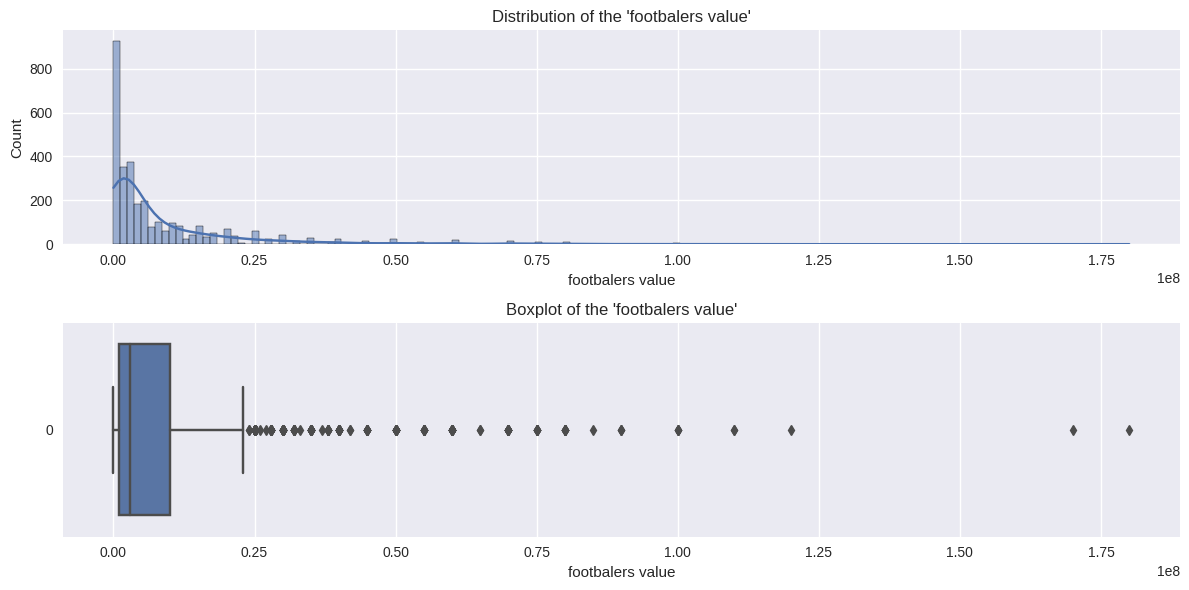

skewness: 3.64
kurtosis: 20.24


count         3,126.00
mean      8,938,515.67
std      14,635,060.56
min               0.00
25%       1,000,000.00
50%       3,000,000.00
75%      10,000,000.00
max     180,000,000.00
Name: wartosc_eur, dtype: float64

In [277]:
def plots_stats(col, name):
    fig, axs = plt.subplots(2, 1, figsize=(12,6))

    #(displot)
    sns.histplot(col, ax=axs[0], kde=True)
    axs[0].set_xlabel(name)
    axs[0].set_title("Distribution of the '" + name + "'")


    #(boxplot)
    sns.boxplot(col, ax=axs[1], orient='h')
    axs[1].set_xlabel(name) # tutaj dodać w jakiej skali są kwoty
    axs[1].set_title("Boxplot of the '" + name + "'")

    plt.tight_layout()
    plt.show()

    print(f"skewness: {col.skew():.2f}")
    print(f"kurtosis: {col.kurt():.2f}")

    display(col.describe())



plots_stats(df["wartosc_eur"], "footbalers value")

As you can see from the graph, the distribution is not normal. The long tail on the right and significant outliers are also confirmed by skewness and kurtosis
<br>
75% of the analyzed players are cheaper than 1 million eur,
The average price is 8.9 million eur <br>
The value of 0 seems odd





In [278]:
print((df['wartosc_eur'] == 0).sum())
df[df['wartosc_eur'] == 0]

15


,klub,pilkarz,pozycja,wzrost,dominujaca_noga,wartosc_eur,liga,wiek,POSITIONS,OVA,POT,ATTACKING,SKILL,MOVEMENT,POWER,MENTALITY,DEFENDING,TOTAL,PAC,SHO,PAS,DRI,DEF,PHY,VALUE_EUR,SALARY_EUR,ws_skutecznosc_podan,ws_wygrane_pojedynki_na_mecz,ws_MotM,ws_asysty,ws_minuty,ws_bramki,ws_wystepy,ws_srednia_ocena
262,Bayern Monachium,Arijon Ibrahimovic,Ofensywny pomocnik,"1,76m",prawonożny,0.00,bundesliga,17,CAM LM,59.00,80.00,294.00,293.00,305.00,261.00,252.00,70.00,"1,527.00",59.00,62.00,56.00,63.00,26.00,46.00,"700,000.00","1,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Manchester City,Benjamin Mendy,Lewy obrońca,"1,85m",lewonożny,0.00,premier league,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,1.FSV Mainz 05,Brajan Gruda,Prawy napastnik,-,lewonożny,0.00,bundesliga,18,RW ST CAM,59.00,77.00,280.00,293.00,323.00,288.00,232.00,72.00,"1,538.00",67.00,63.00,53.00,63.00,28.00,49.00,"575,000.00","2,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
591,OGC Nice,Daouda Traore,Prawy pomocnik,"1,86m",,0.00,ligue 1,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040,GD Chaves,Guilherme,Środkowy obrońca,"1,91m",lewonożny,0.00,liga nos,22,CB,61.00,67.00,202.00,155.00,265.00,277.00,241.00,196.00,"1,390.00",55.00,36.00,36.00,36.00,64.00,67.00,"475,000.00","1,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1137,FC Paris Saint-Germain,Ilyes Housni,Środkowy napastnik,"1,72m",prawonożny,0.00,ligue 1,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1906,Gil Vicente FC,Marlon,Lewy napastnik,"1,76m",prawonożny,0.00,liga nos,25,RW LW,60.00,62.00,284.00,266.00,331.00,255.00,207.00,86.00,"1,491.00",68.00,63.00,48.00,67.00,28.00,41.00,"325,000.00","2,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1935,Manchester United,Mason Greenwood,Prawy napastnik,"1,81m",obunożny,0.00,premier league,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2163,Eintracht Frankfurt,Nacho Ferri,Środkowy napastnik,"1,92m",prawonożny,0.00,bundesliga,18,ST,61.00,80.00,285.00,231.00,310.00,309.00,216.00,64.00,"1,463.00",73.00,63.00,47.00,55.00,25.00,61.00,"825,000.00","950,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2298,FC Bologna,Orji Okwonkwo,Prawy napastnik,"1,80m",prawonożny,0.00,serie a,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These are footballers who are excluded from clubs for various reasons (such as legal proceedings against them). I will remove them from the data set, as there are only 15 of them

In [279]:
df = df[df.wartosc_eur != 0]

In [280]:
print((df['VALUE_EUR'] == 0).sum())
df[df['VALUE_EUR'] == 0]

2


,klub,pilkarz,pozycja,wzrost,dominujaca_noga,wartosc_eur,liga,wiek,POSITIONS,OVA,POT,ATTACKING,SKILL,MOVEMENT,POWER,MENTALITY,DEFENDING,TOTAL,PAC,SHO,PAS,DRI,DEF,PHY,VALUE_EUR,SALARY_EUR,ws_skutecznosc_podan,ws_wygrane_pojedynki_na_mecz,ws_MotM,ws_asysty,ws_minuty,ws_bramki,ws_wystepy,ws_srednia_ocena
1307,Real Betis Balompié,Joaquin,Prawy napastnik,"1,81m",prawonożny,"1,500,000.00",laliga,41,RM LM CAM,79.00,79.00,383.00,411.00,350.00,280.00,331.00,127.00,"1,932.00",65.00,77.00,85.00,80.00,44.00,51.00,0.00,"20,000.00",87.8,-,-,1,162.00,-,1(5),6.48
3087,AC Milan,Zlatan Ibrahimovic,Środkowy napastnik,"1,95m",prawonożny,"2,000,000.00",serie a,41,ST,82.00,82.00,401.00,385.00,311.00,367.00,355.00,89.00,"1,967.00",58.00,85.00,76.00,77.00,34.00,72.00,0.00,"63,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's transform the value using the logarithm. This will make the outliers less significant

<ipython-input-281-3d23330f2e41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wartosc_log'] = np.log(df['wartosc_eur'])


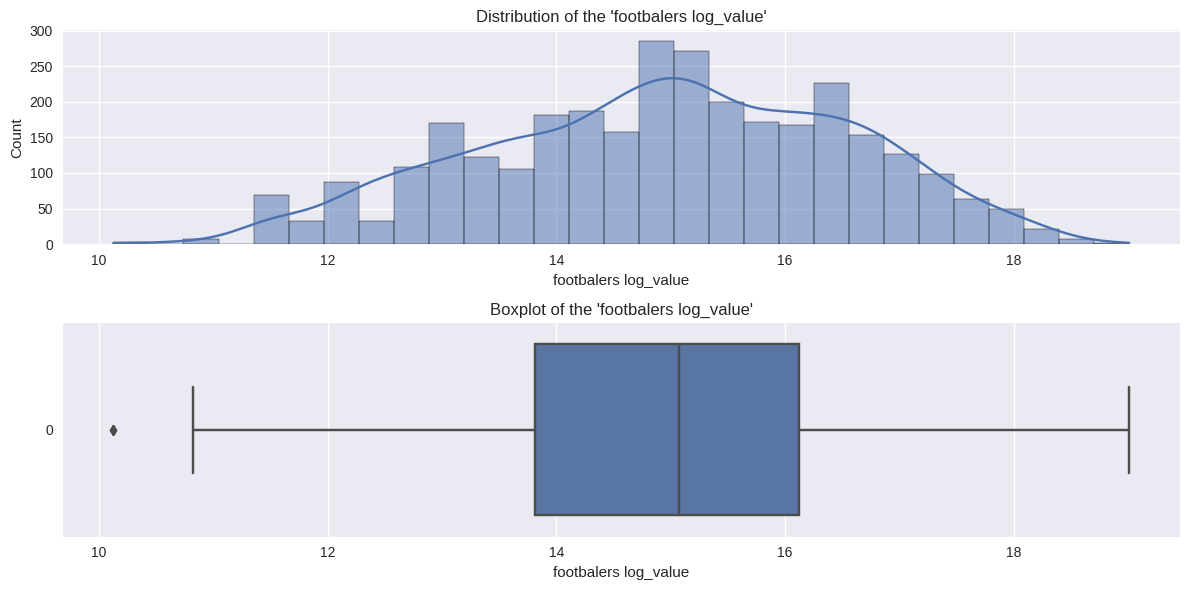

skewness: -0.18
kurtosis: -0.59


count   3,111.00
mean       14.94
std         1.60
min        10.13
25%        13.82
50%        15.07
75%        16.12
max        19.01
Name: wartosc_log, dtype: float64

In [281]:
df['wartosc_log'] = np.log(df['wartosc_eur'])
plots_stats(df["wartosc_log"], "footbalers log_value")

After the transformation, the data distribution more closely resembles a normal distribution

<ipython-input-282-532eaa805acc>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


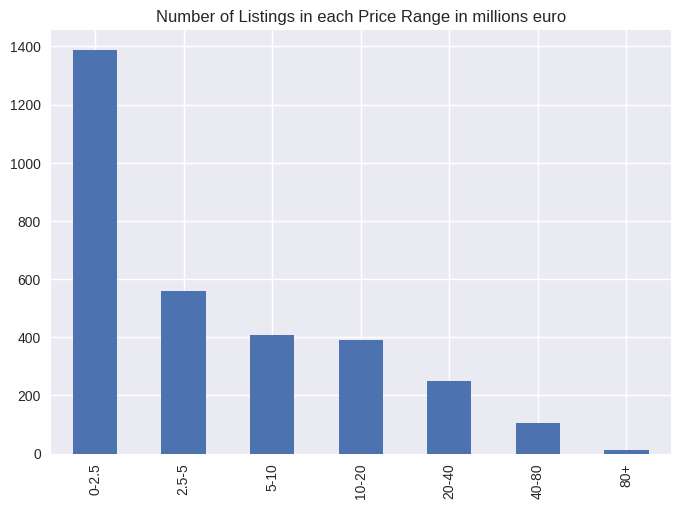

In [282]:
plt.style.use("seaborn")
price_range = pd.cut(df["wartosc_eur"],
                     bins=[0, 2500000, 5000000, 10000000, 20000000, 40000000, 80000000, df["wartosc_eur"].max()],
                     labels=["0-2.5", "2.5-5", "5-10", "10-20", "20-40", "40-80", "80+"])
df["price_range"] = price_range
df["price_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings in each Price Range in millions euro")
plt.show()


In [283]:
#The 10 most expensive players
top10 = df[["pilkarz", "wartosc_eur", "klub", "VALUE_EUR"]].sort_values(by="wartosc_eur", ascending=False).head(10)
top10 = top10.reset_index(drop=True)
top10.index = top10.index + 1
print(top10)

              pilkarz    wartosc_eur                    klub      VALUE_EUR
1       Kylian Mbappe 180,000,000.00  FC Paris Saint-Germain 190,500,000.00
2      Erling Haaland 170,000,000.00         Manchester City 160,000,000.00
3     Vinicius Junior 120,000,000.00             Real Madryt 109,000,000.00
4     Jude Bellingham 110,000,000.00       Borussia Dortmund  81,500,000.00
5          Phil Foden 110,000,000.00         Manchester City 109,500,000.00
6   Federico Valverde 100,000,000.00             Real Madryt  81,000,000.00
7       Jamal Musiala 100,000,000.00        Bayern Monachium  78,500,000.00
8         Bukayo Saka 100,000,000.00              FC Arsenal  72,000,000.00
9               Pedri 100,000,000.00            FC Barcelona 104,500,000.00
10         Harry Kane  90,000,000.00       Tottenham Hotspur 105,500,000.00


In [284]:
#The 10 most expensive but values from fifa
top10 = df[["pilkarz", "VALUE_EUR", "klub", "wartosc_eur"]].sort_values(by="VALUE_EUR", ascending=False).head(10)
top10 = top10.reset_index(drop=True)
top10.index = top10.index + 1
print(top10)

            pilkarz      VALUE_EUR                    klub    wartosc_eur
1     Kylian Mbappe 190,500,000.00  FC Paris Saint-Germain 180,000,000.00
2    Erling Haaland 160,000,000.00         Manchester City 170,000,000.00
3   Frenkie de Jong 116,500,000.00            FC Barcelona  50,000,000.00
4     Mohamed Salah 115,500,000.00            FC Liverpool  80,000,000.00
5        Phil Foden 109,500,000.00         Manchester City 110,000,000.00
6   Vinicius Junior 109,000,000.00             Real Madryt 120,000,000.00
7        Ruben Dias 107,500,000.00         Manchester City  75,000,000.00
8   Kevin De Bruyne 107,500,000.00         Manchester City  80,000,000.00
9    Joshua Kimmich 105,500,000.00        Bayern Monachium  80,000,000.00
10       Harry Kane 105,500,000.00       Tottenham Hotspur  90,000,000.00


In [285]:
#The 10 best rated footballers from fifa
top10 = df[["pilkarz", "OVA", "klub"]].sort_values(by="OVA", ascending=False).head(10)
top10 = top10.reset_index(drop=True)
top10.index = top10.index + 1
print(top10)

               pilkarz   OVA                    klub
1   Robert Lewandowski 91.00            FC Barcelona
2        Karim Benzema 91.00             Real Madryt
3        Kylian Mbappe 91.00  FC Paris Saint-Germain
4         Lionel Messi 91.00  FC Paris Saint-Germain
5      Kevin De Bruyne 91.00         Manchester City
6        Mohamed Salah 90.00            FC Liverpool
7     Thibaut Courtois 90.00             Real Madryt
8           Harry Kane 89.00       Tottenham Hotspur
9      Virgil van Dijk 89.00            FC Liverpool
10           Jan Oblak 89.00         Atlético Madryt


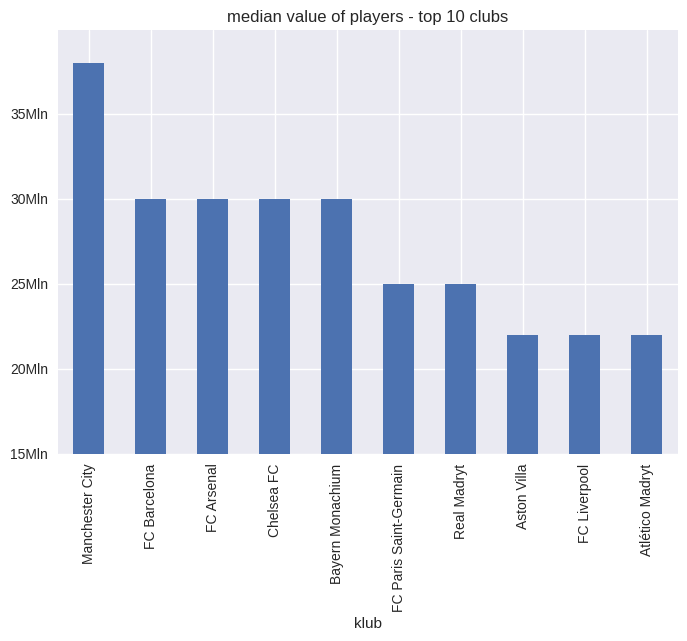

In [286]:
club_median_price = df.groupby(['klub'])['wartosc_eur'].median().sort_values(ascending=False).head(10)
ax = club_median_price.plot.bar(x='klub', y='wartosc_eur')
ax.set_title("median value of players - top 10 clubs")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,g}'.format(y/1000000) + 'Mln'))
ax.set_ybound(lower=15000000, upper=None)
plt.show()

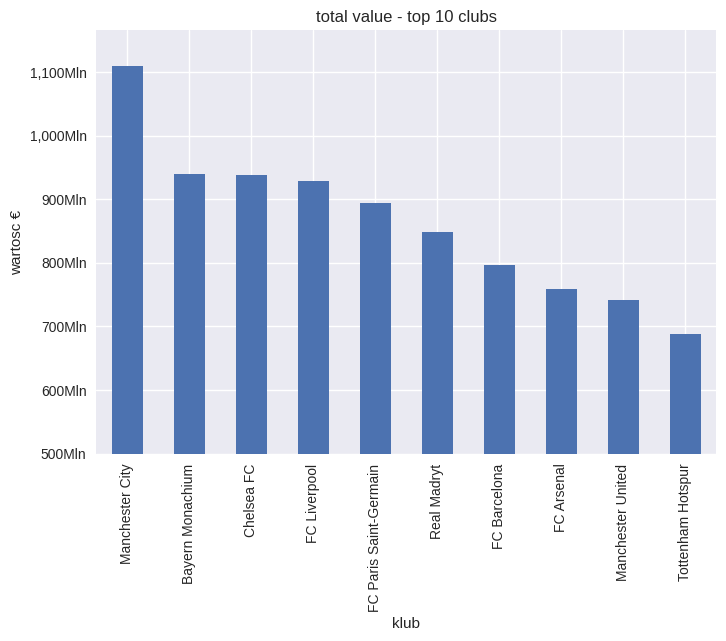

In [287]:
club_sum_price = df.groupby(['klub'])['wartosc_eur'].sum().sort_values(ascending=False).head(10)
ax = club_sum_price.plot.bar(x='klub', y='wartosc_eur')
ax.set_title("total value - top 10 clubs")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,g}'.format(y/1000000) + 'Mln'))
ax.set_ybound(lower=500000000, upper=None)
ax.set_ylabel("wartosc €", fontdict=None, labelpad=None)
plt.show()

In [288]:
df_copy2 = df.copy()
df = df_copy2

## height

In [289]:
df['wzrost'] = df['wzrost'].str.replace(',','')
df['wzrost'] = df['wzrost'].str.replace('m','')
df['wzrost'] = df['wzrost'].str.replace('-','0')
df['wzrost'] = df['wzrost'].astype(float)

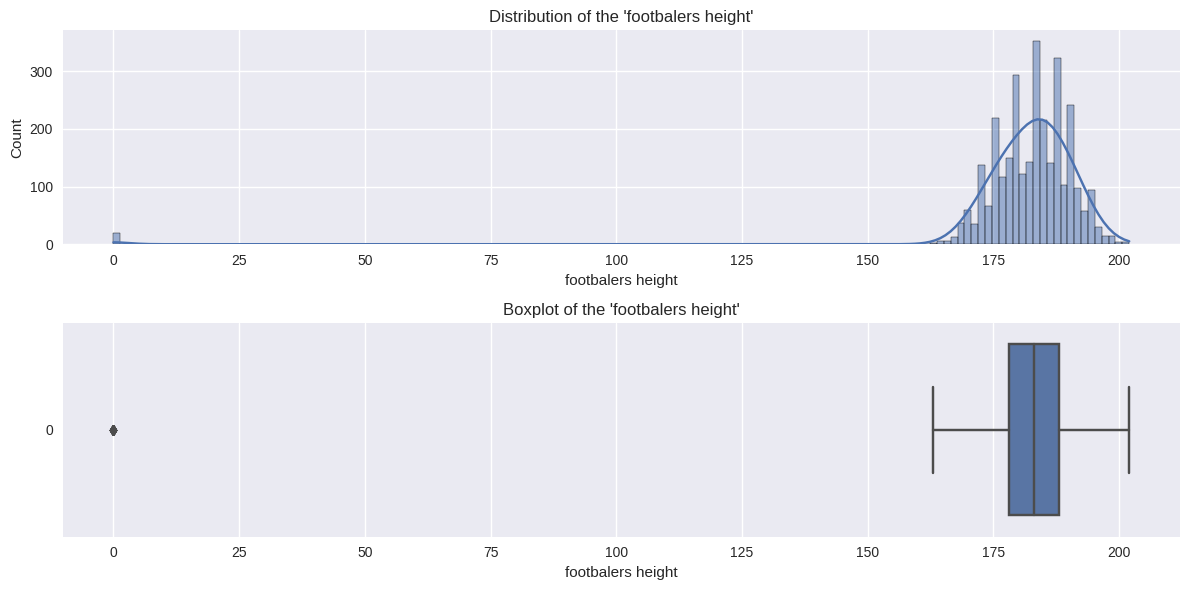

skewness: -9.36
kurtosis: 105.53


count   3,111.00
mean      181.76
std        15.75
min         0.00
25%       178.00
50%       183.00
75%       188.00
max       202.00
Name: wzrost, dtype: float64

In [290]:
plots_stats(df["wzrost"], "footbalers height")

Let's define a function so we can easily look at the relationship between variables and the value of the players

In [291]:
def plot_scatter_with_line(df, x_variable, y_variable, line=True):


    plt.scatter(df[x_variable], df[y_variable], alpha=0.2)

    if line:
      z = np.polyfit(df[x_variable], df[y_variable], 1)
      p = np.poly1d(z)
      plt.plot(df[x_variable], p(df[x_variable]))

    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.title("'{}' vs '{}'".format(x_variable, y_variable))


    correlation = stats.pearsonr(df[y_variable], df[x_variable])
    print(("\033[1mPearson's\033[0m correlation coefficient between \033[1m{}\033[0m and \033[1m{}\033[0m is \033[1m{:.4f}\033[0m and \033[1mp-value {:.2f}\033[0m."
           ).format(x_variable, y_variable, correlation[0], correlation[1]))

    plt.show()

Pearson's correlation coefficient between wzrost and wartosc_log is 0.0927 and p-value 0.00.


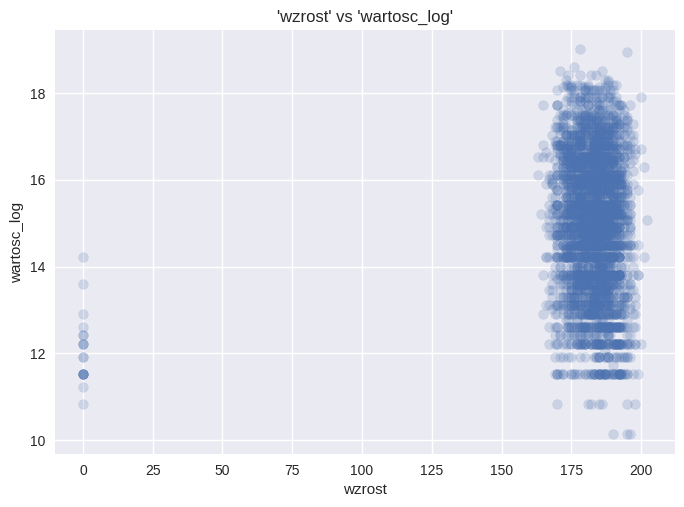

In [292]:
plot_scatter_with_line(df, 'wzrost', 'wartosc_log', line=False)

Footballers' height does not seem to correlate with value

## Age

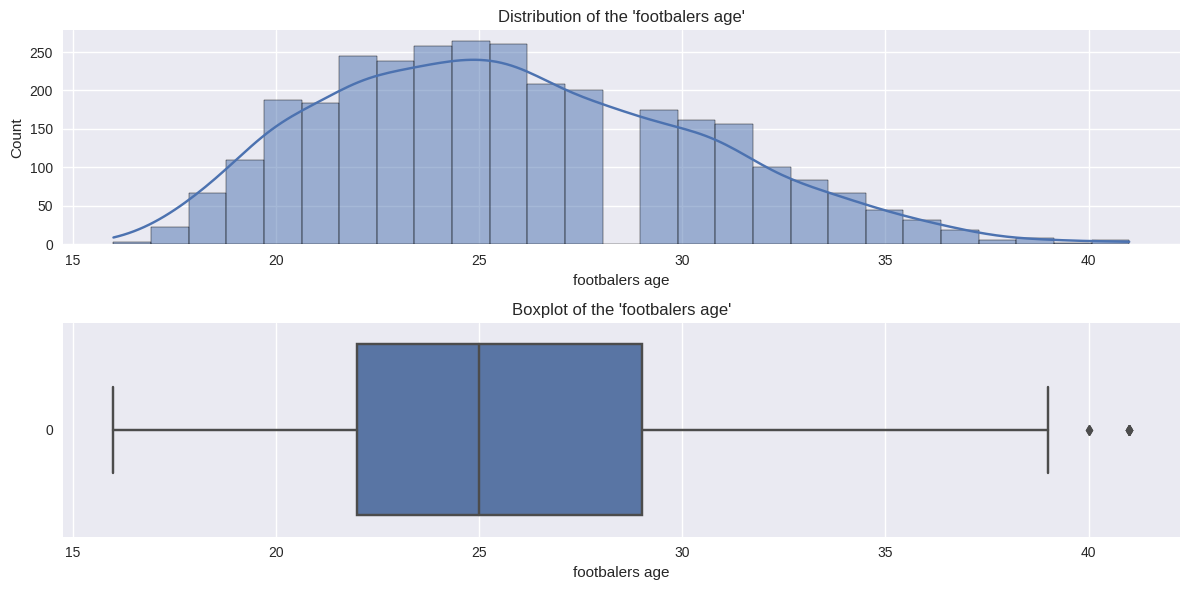

skewness: 0.41
kurtosis: -0.29


count   3,111.00
mean       25.82
std         4.55
min        16.00
25%        22.00
50%        25.00
75%        29.00
max        41.00
Name: wiek, dtype: float64

In [293]:
plots_stats(df["wiek"], "footbalers age")

Pearson's correlation coefficient between wiek and wartosc_log is -0.0054 and p-value 0.76.


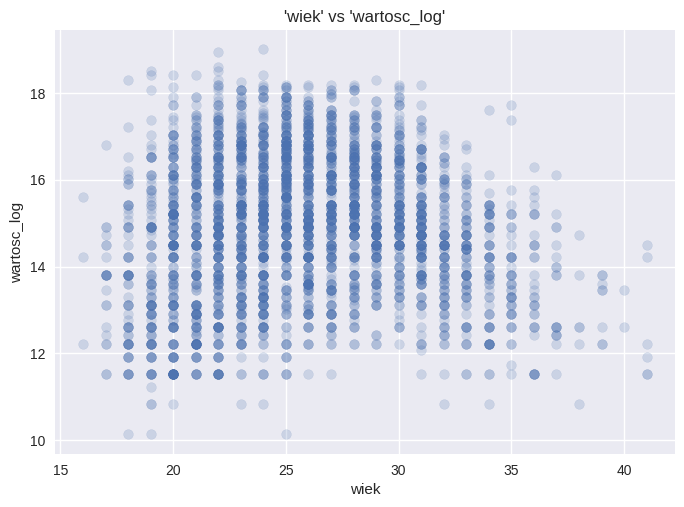

In [294]:
plot_scatter_with_line(df, 'wiek', 'wartosc_log', line=False)

## positions

In [295]:
#comparison of POSITIONS and pozycja columns, "pozycja" seems better.
df["POSITIONS"].unique()

array(['LB CB ', 'RB LB RWB ', 'GK ', 'CM CAM ', 'RB ', 'LB LM ', nan,
       'CDM CM ', 'RM ST ', 'LM RM LW ', 'CAM CM LM ', 'CB LB ',
       'CDM CM RM ', 'RB RWB LB ', 'CM CDM ', 'LWB LB ', 'CB ', 'ST LM ',
       'ST ', 'RB RWB ', 'LW ST CAM ', 'CAM LM ST ', 'CM CF CDM ',
       'LB RB ', 'LWB LM LB ', 'RW ST RM ', 'LM RM ', 'LM CAM CM ',
       'RW LW ', 'ST LW ', 'CB CDM ', 'CM LM ', 'LB ', 'ST RM ',
       'RM LM ST ', 'LB LWB ', 'LB RB LWB ', 'ST CAM CM ', 'RWB CM RB ',
       'RM LM RB ', 'CM RM CF ', 'ST CAM ', 'RM ', 'CF LM ', 'RM RB ',
       'CAM ', 'LB LM RB ', 'LW LM ', 'LB LWB LM ', 'RB RM RWB ',
       'LM RM CAM ', 'CF CAM ', 'CM ', 'LW ', 'CB RB ', 'CAM CM RM ',
       'CM RW CDM ', 'RB RM ', 'CB RB CDM ', 'ST CF ', 'LM ST ',
       'CDM CM CB ', 'CM LM LW ', 'RM LM CAM ', 'RW RM ', 'CB RB LB ',
       'LM LW ', 'CB RWB ', 'CM CDM RM ', 'LM ST RM ', 'LM CAM ',
       'LW RW ', 'LWB LM RWB ', 'RWB RB ', 'CAM CM ', 'ST RW LW ', 'CDM ',
       'ST RM CAM ', 'LWB LM ', '

In [296]:
df["pozycja"].unique()

array(['Lewy obrońca', 'Bramkarz', 'Środkowy pomocnik', 'Prawy obrońca',
       'Prawy napastnik', 'Lewy napastnik', 'Ofensywny pomocnik',
       'Środkowy obrońca', 'Defensywny pomocnik', 'Środkowy napastnik',
       'Prawy pomocnik', 'Cofnięty napastnik', 'Lewy pomocnik'],
      dtype=object)

In [297]:
df = df.drop(['POSITIONS'], axis = 1)

<Axes: title={'center': 'distribution of players in relation to their position on the pitch'}, ylabel='pozycja'>

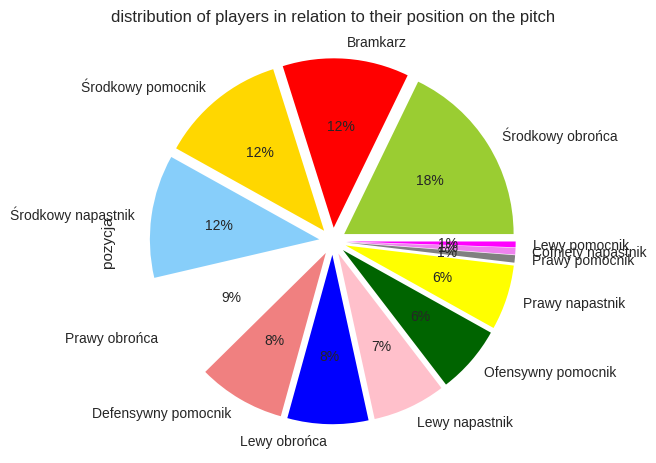

In [298]:
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue',
          'white','lightcoral','blue','pink', 'darkgreen',
          'yellow','grey','violet','magenta']
explode = (0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08)
df.pozycja.value_counts().plot(title = "distribution of players in relation to their position on the pitch",
                               kind='pie', autopct='%1.0f%%', explode = explode, colors=colors)


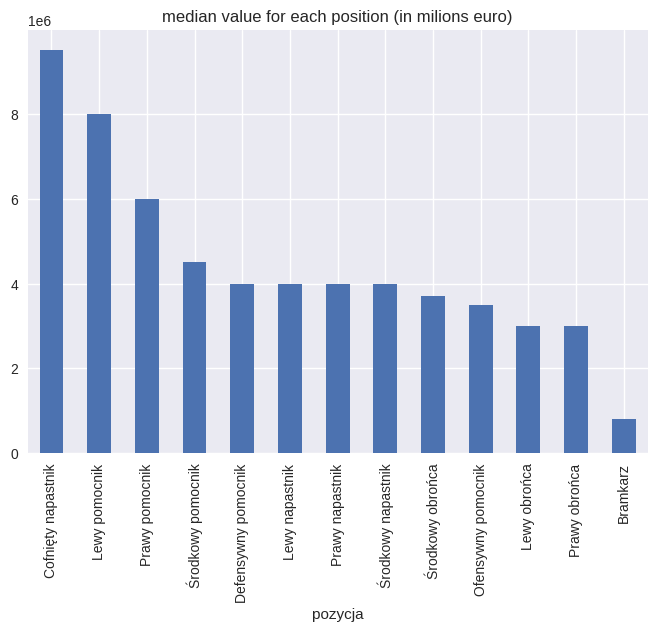

In [299]:
#we can see the disparity in value by position, from forwards and wingers to defense
position_md_price = (df.groupby(['pozycja'])['wartosc_eur'].median()).sort_values(ascending=False)
position_md_price.plot(kind="bar")
plt.title("median value for each position (in milions euro)")
plt.show()


Let's group positions into fewer categories<br>
It looks like last word will do the trick

In [300]:
df["position_grouped"] = df["pozycja"].str.split().str[-1]
df["position_grouped"].unique()

array(['obrońca', 'Bramkarz', 'pomocnik', 'napastnik'], dtype=object)

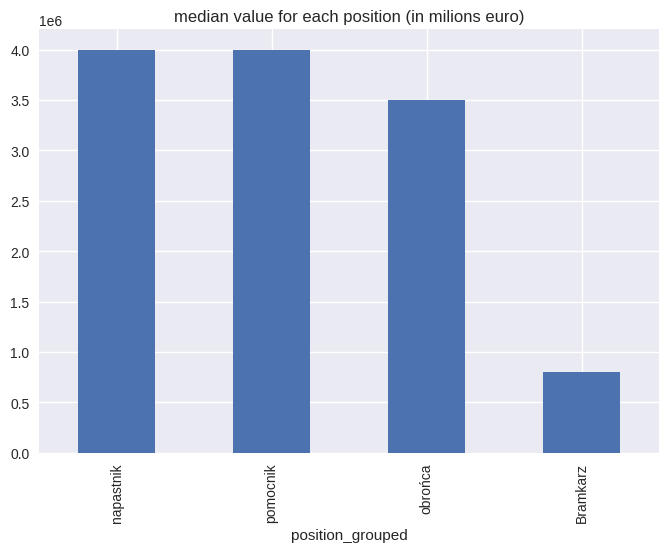

In [301]:
position_md_price2 = (df.groupby(['position_grouped'])['wartosc_eur'].median()).sort_values(ascending=False)
position_md_price2.plot(kind="bar")
plt.title("median value for each position (in milions euro)")
plt.show()

I will use One-Hot Encoding to change categorical feature into numerical

In [302]:
one_hot_encoded = pd.get_dummies(df['position_grouped'])
df = pd.concat([df, one_hot_encoded], axis=1)

In [303]:
#mapping_dict = {'Bramkarz': 0, 'obrońca': 1, 'pomocnik': 2, 'napastnik': 3}
#df['position_cat'] = df['position_grouped'].map(mapping_dict)

In [304]:
#plot_scatter_with_line(df, 'position_cat', 'wartosc_log', line=False)

## League

I am using the median because I have outliers, and I can't remove them, because the purpose of the exercise is, among other things, to find them


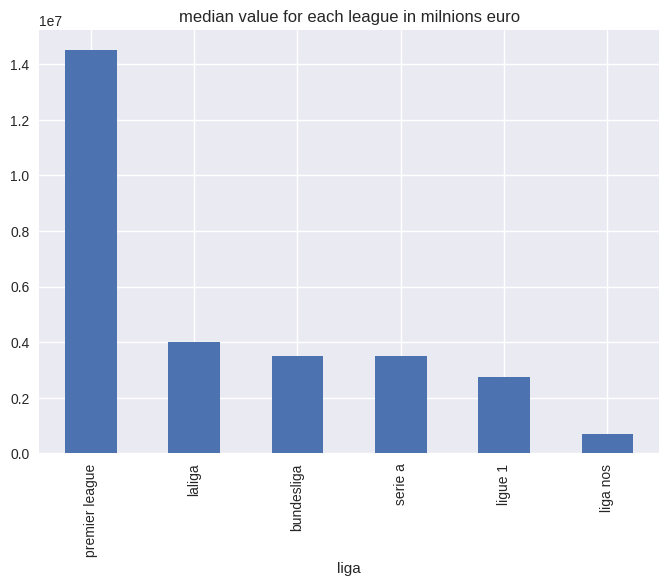

In [305]:
league_md_price = df.groupby(['liga'])['wartosc_eur'].median().sort_values(ascending=False)
league_md_price.plot(kind="bar")
plt.title("median value for each league in milnions euro")
plt.show()

We can see the disparity of values depending on the league <br>


I will straight away replace the categorical variable with a numerical one

In [306]:
one_hot_encoded = pd.get_dummies(df['liga'])
df = pd.concat([df, one_hot_encoded], axis=1)

In [307]:
#mapping_dict = {'liga nos': 0, 'ligue 1': 1, 'serie a': 2, 'bundesliga': 3, 'laliga': 4, 'premier league': 5}
#df['league_cat'] = df['liga'].map(mapping_dict)

In [308]:
#plot_scatter_with_line(df, 'league_cat', 'wartosc_log', line=False)

## ws_columns

In [309]:
df.head()

,klub,pilkarz,pozycja,wzrost,dominujaca_noga,wartosc_eur,liga,wiek,OVA,POT,ATTACKING,SKILL,MOVEMENT,POWER,MENTALITY,DEFENDING,TOTAL,PAC,SHO,PAS,DRI,DEF,PHY,VALUE_EUR,SALARY_EUR,ws_skutecznosc_podan,ws_wygrane_pojedynki_na_mecz,ws_MotM,ws_asysty,ws_minuty,ws_bramki,ws_wystepy,ws_srednia_ocena,wartosc_log,price_range,position_grouped,Bramkarz,napastnik,obrońca,pomocnik,bundesliga,laliga,liga nos,ligue 1,premier league,serie a
0,West Ham United,Aaron Cresswell,Lewy obrońca,170.00,lewonożny,"2,500,000.00",premier league,33,78.00,78.00,330.00,378.00,350.00,357.00,337.00,235.00,"2,038.00",64.00,60.00,75.00,75.00,77.00,68.00,"9,500,000.00","60,000.00",83.2,1.3,-,-,"1,534.00",-,17(1),6.66,14.73,0-2.5,obrońca,0,0,1,0,0,0,0,0,1,0
1,FC Brentford,Aaron Hickey,Lewy obrońca,185.00,obunożny,"18,000,000.00",premier league,20,75.00,82.00,311.00,320.00,361.00,321.00,288.00,217.00,"1,871.00",77.00,55.00,69.00,73.00,70.00,58.00,"10,500,000.00","28,000.00",83.1,0.4,-,-,684.00,-,8(1),6.51,16.71,10-20,obrońca,0,0,1,0,0,0,0,0,1,0
2,FC Arsenal,Aaron Ramsdale,Bramkarz,190.00,prawonożny,"30,000,000.00",premier league,24,82.00,86.00,114.00,140.00,279.00,239.00,166.00,51.00,"1,396.00",83.00,77.00,85.00,84.00,48.00,78.00,"34,500,000.00","62,000.00",60.2,0.2,1,-,"1,620.00",-,18,6.80,17.22,20-40,Bramkarz,1,0,0,0,0,0,0,0,1,0
3,OGC Nice,Aaron Ramsey,Środkowy pomocnik,178.00,prawonożny,"3,000,000.00",ligue 1,32,76.00,76.00,349.00,390.00,321.00,333.00,359.00,200.00,"1,992.00",51.00,71.00,78.00,79.00,65.00,62.00,"6,000,000.00","38,000.00",88.2,0.2,1,1,710.00,1,7(7),6.74,14.91,2.5-5,pomocnik,0,0,0,1,0,0,0,1,0,0
4,Manchester United,Aaron Wan-Bissaka,Prawy obrońca,183.00,prawonożny,"18,000,000.00",premier league,25,79.00,82.00,277.00,315.00,385.00,321.00,327.00,245.00,"1,909.00",82.00,50.00,65.00,73.00,77.00,70.00,"22,000,000.00","86,000.00",79.4,0.2,-,-,433.00,-,5(1),6.95,16.71,10-20,obrońca,0,0,1,0,0,0,0,0,1,0


In [310]:
ws_col = ["ws_asysty", "ws_bramki", "ws_MotM", "ws_wygrane_pojedynki_na_mecz", "ws_srednia_ocena", "ws_skutecznosc_podan", "ws_wystepy", "ws_minuty"]
for col in ws_col:
  a = ((df[col] == "-").sum()) / (df[col].count()) * 100
  print("{:.2f}% of players have no value in {} column".format(a, col))

63.31% of players have no value in ws_asysty column
59.90% of players have no value in ws_bramki column
75.36% of players have no value in ws_MotM column
11.09% of players have no value in ws_wygrane_pojedynki_na_mecz column
0.00% of players have no value in ws_srednia_ocena column
0.83% of players have no value in ws_skutecznosc_podan column
0.00% of players have no value in ws_wystepy column
0.00% of players have no value in ws_minuty column


As you can see above, a large % of players have no values in columns a, b and c (not including nulls). <br>
I will not use these columns

### average ws rating

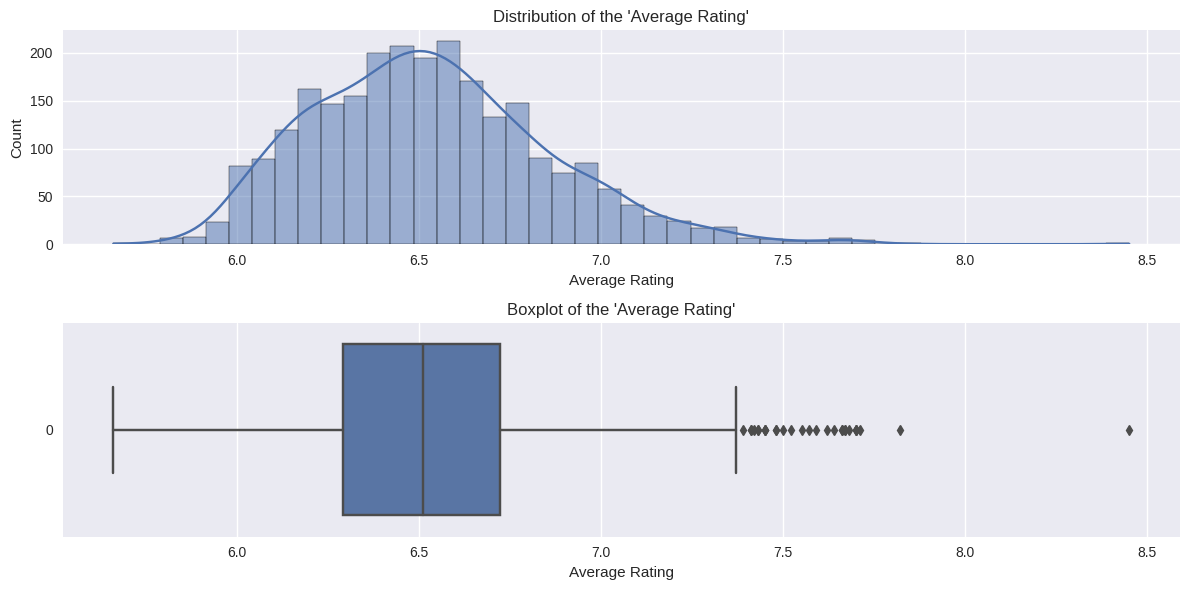

skewness: 0.61
kurtosis: 0.73


count   2,524.00
mean        6.53
std         0.33
min         5.66
25%         6.29
50%         6.51
75%         6.72
max         8.45
Name: ws_srednia_ocena, dtype: float64

In [311]:
plots_stats(df["ws_srednia_ocena"], "Average Rating")

In [312]:
nans = df["ws_srednia_ocena"].isna().sum()/len(df["ws_srednia_ocena"])*100
print(f"There is {nans:.2f}% of nan values in average_ws_rating variable")

There is 18.87% of nan values in average_ws_rating variable


In [313]:
def drop_na_plot_scatter_with_line(df, x_variable, y_variable):
    df_filtered = df.dropna(subset=[x_variable, y_variable])

    z = np.polyfit(df_filtered[x_variable], df_filtered[y_variable], 1)
    p = np.poly1d(z)

    plt.scatter(df_filtered[x_variable], df_filtered[y_variable], alpha=0.3)
    plt.plot(df_filtered[x_variable], p(df_filtered[x_variable]))

    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.title("'{}' vs '{}'".format(x_variable, y_variable))

    correlation = stats.pearsonr(df_filtered[y_variable], df_filtered[x_variable])
    print(("\033[1mPearson's\033[0m correlation coefficient between \033[1m{}\033[0m and \033[1m{}\033[0m is \033[1m{:.4f}\033[0m and \033[1mp-value {:.2f}\033[0m."
           ).format(x_variable, y_variable, correlation[0], correlation[1]))

    plt.show()

Pearson's correlation coefficient between ws_srednia_ocena and wartosc_log is 0.4437 and p-value 0.00.


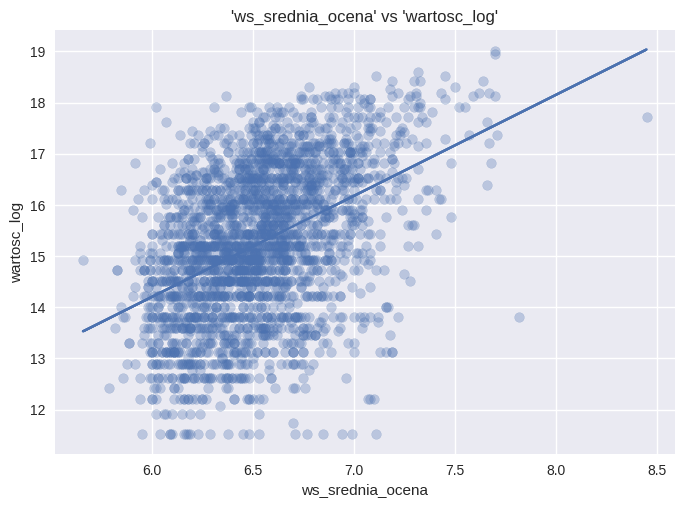

In [314]:
drop_na_plot_scatter_with_line(df, 'ws_srednia_ocena', 'wartosc_log')

I will fill in nans with the median rating at a given club in a given position <br>
let's check for missing data according to the above reasoning (median for position)

In [315]:
median_by_pos = df.groupby(["klub", "pozycja"])["ws_srednia_ocena"].median()
median_by_pos.isnull().any()

True

Let's check by grouped position

In [316]:
median_by_pos = df.groupby(["klub", "position_grouped"])["ws_srednia_ocena"].median()
median_by_pos.isnull().any()

False

I can fill nans with median for grouped_position in given club

In [317]:
df['ws_srednia_ocena_fixed'] = df['ws_srednia_ocena'].fillna(df.groupby(["klub", "position_grouped"])['ws_srednia_ocena'].transform('median'))

In [318]:
df['ws_srednia_ocena_fixed'].isnull().any()

False

Pearson's correlation coefficient between ws_srednia_ocena_fixed and wartosc_log is 0.3248 and p-value 0.00.


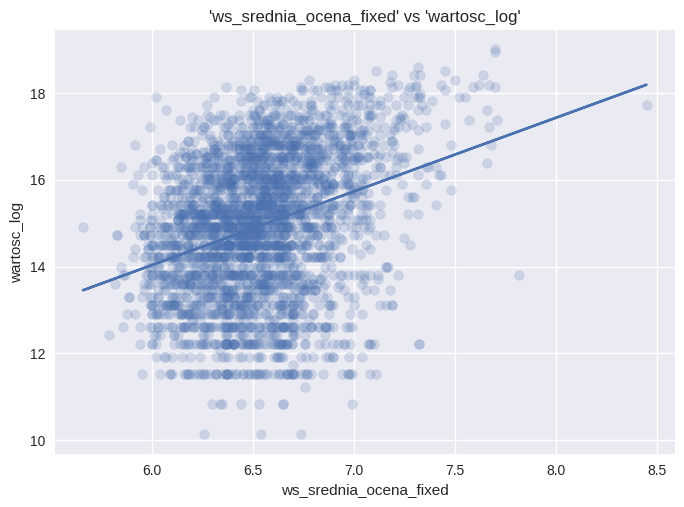

In [319]:
plot_scatter_with_line(df, 'ws_srednia_ocena_fixed', 'wartosc_log')


It appears that by filling the nans with the median, Pearson's correlation drops from 0.44 to 0.32

I don't know if it's a good idea to fill in missing data for this feature. In many cases, a player may not have an average rating because he hasn't played a match (in the who_scored set, players without a match played are simply absent). Half of the nulls are due to the fact that the player has not played any matches and thus has no average rating. The other half of the nulls are due to the lack of a match between the two sets. (I know this because when combining the data, 289 rows from who_scored did not find a match in transfermarkt, the other way it was 615 rows) <br> <br>
So I should probably either remove the rows with missing data (I will lose about 19% of the data) or I should not use the average score feature. I will check first how the situation is with other variables.


Another idea is to prepare two sets of data. One with filled nans and one with nans removed

I will fill nans with average from the whole set to see what it does

In [320]:
df['ws_srednia_ocena_fixed2'] = df['ws_srednia_ocena'].fillna(df['ws_srednia_ocena'].mean())
df['ws_srednia_ocena_fixed2'].isnull().any()

False

Pearson's correlation coefficient between ws_srednia_ocena_fixed2 and wartosc_log is 0.3612 and p-value 0.00.


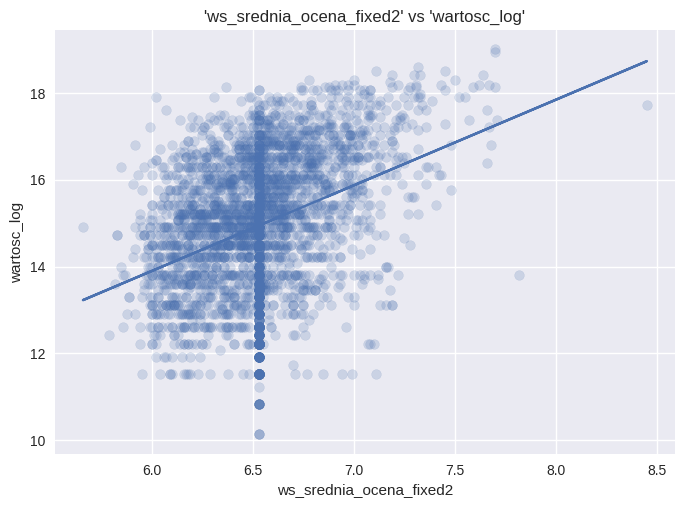

In [321]:
plot_scatter_with_line(df, 'ws_srednia_ocena_fixed2', 'wartosc_log')


### minutes played

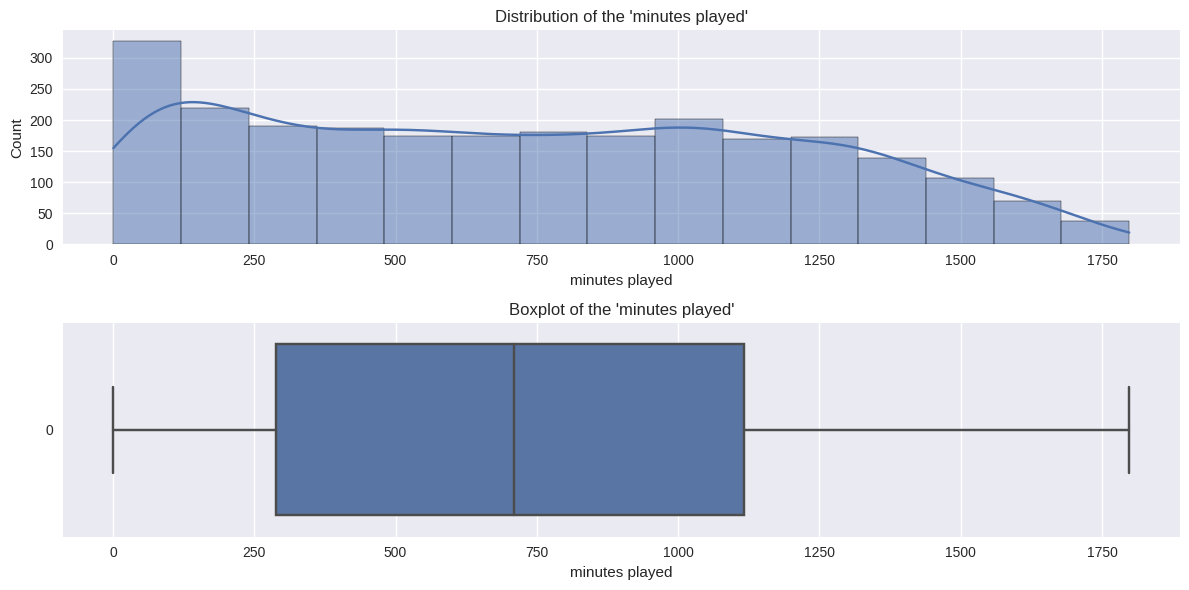

skewness: 0.18
kurtosis: -1.11


count   2,524.00
mean      727.96
std       481.87
min         1.00
25%       289.00
50%       710.50
75%     1,116.00
max     1,798.00
Name: ws_minuty, dtype: float64

In [322]:
plots_stats(df["ws_minuty"], "minutes played")

Pearson's correlation coefficient between ws_minuty and wartosc_log is 0.3976 and p-value 0.00.


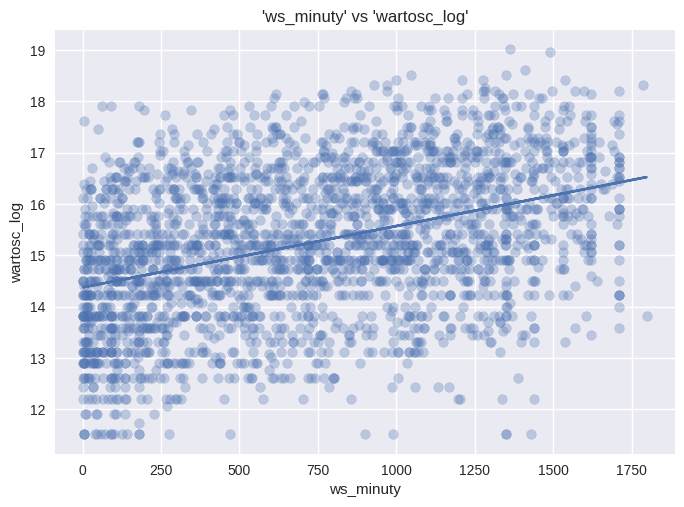

In [323]:
drop_na_plot_scatter_with_line(df, 'ws_minuty', 'wartosc_log')

###Appearances

In [324]:
df["ws_wystepy"].head()

0    17(1)
1     8(1)
2       18
3     7(7)
4     5(1)
Name: ws_wystepy, dtype: object

It appears that this column includes both appearances from the beginning of the match and appearances from the bench.
<br>
Let's split this into two columns.

In [325]:
df["wystepy_lawka"] = df["ws_wystepy"].str.replace(')','').str.partition('(')[2]
df["ws_wystepy_poczatek"] = df["ws_wystepy"].str.replace(')','').str.partition('(')[0].astype(float)


<ipython-input-325-58fb6f877245>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["wystepy_lawka"] = df["ws_wystepy"].str.replace(')','').str.partition('(')[2]
<ipython-input-325-58fb6f877245>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["ws_wystepy_poczatek"] = df["ws_wystepy"].str.replace(')','').str.partition('(')[0].astype(float)


There were problems with setting the type as float

In [326]:
def convert_float(val):
    try:
        return float(val)
    except ValueError:
        return 0

df["wystepy_lawka"] = df.wystepy_lawka.apply(lambda x: convert_float(x))

In [327]:
df = df.drop([ 'ws_wystepy' ], axis = 1)


Let's create column that sums appearences from the start and from the bench

In [328]:
df["wystepy_suma"] = df["wystepy_lawka"] + df["ws_wystepy_poczatek"]

df["wystepy_suma"].isna().sum()

587

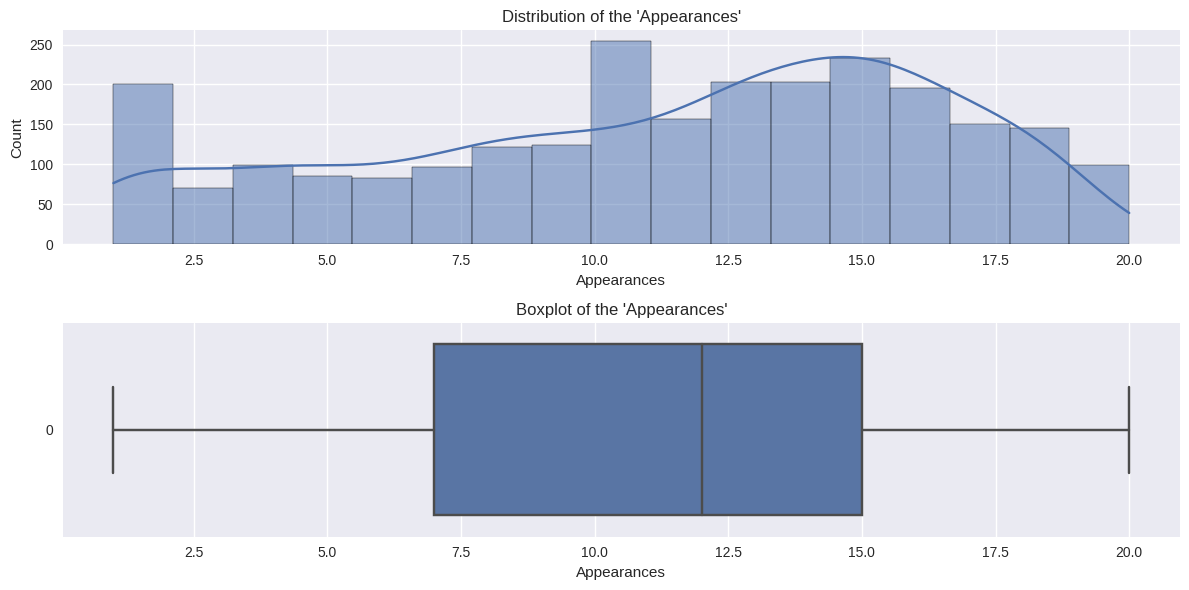

skewness: -0.44
kurtosis: -0.88


count   2,524.00
mean       11.23
std         5.13
min         1.00
25%         7.00
50%        12.00
75%        15.00
max        20.00
Name: wystepy_suma, dtype: float64

In [329]:
plots_stats(df["wystepy_suma"], "Appearances")

Pearson's correlation coefficient between wystepy_suma and wartosc_log is 0.4087 and p-value 0.00.


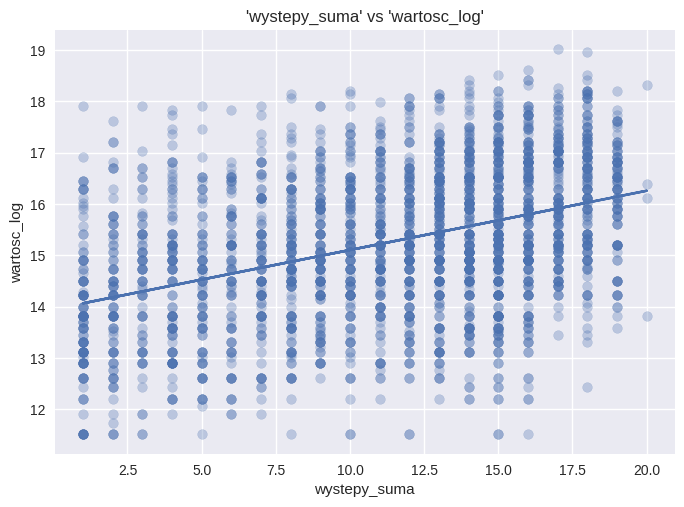

In [330]:
drop_na_plot_scatter_with_line(df, 'wystepy_suma', 'wartosc_log')

Pearson's correlation coefficient between ws_wystepy_poczatek and wartosc_log is 0.3945 and p-value 0.00.


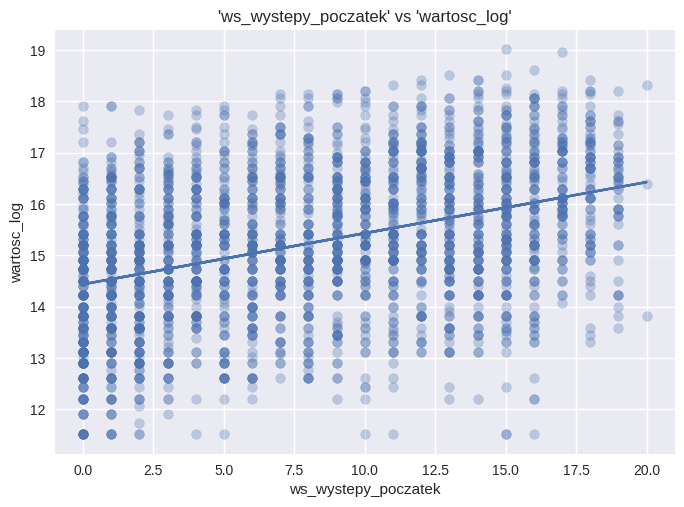

In [331]:
drop_na_plot_scatter_with_line(df, 'ws_wystepy_poczatek', 'wartosc_log')

### ws_bramki

In [332]:
df['ws_bramki'].unique()

array(['-', '1', nan, '3', '2', '9', '11', '4', '7', '5', '6', '8', '10',
       '12', '22', '15', '13'], dtype=object)

In [333]:
df['ws_bramki_fixed'] = df['ws_bramki'].replace('-', 0)
df['ws_bramki_fixed'] = df['ws_bramki_fixed'].fillna("0")
df['ws_bramki_fixed'] = df['ws_bramki_fixed'].astype(int)

df['ws_bramki_fixed'].unique()

array([ 0,  1,  3,  2,  9, 11,  4,  7,  5,  6,  8, 10, 12, 22, 15, 13])

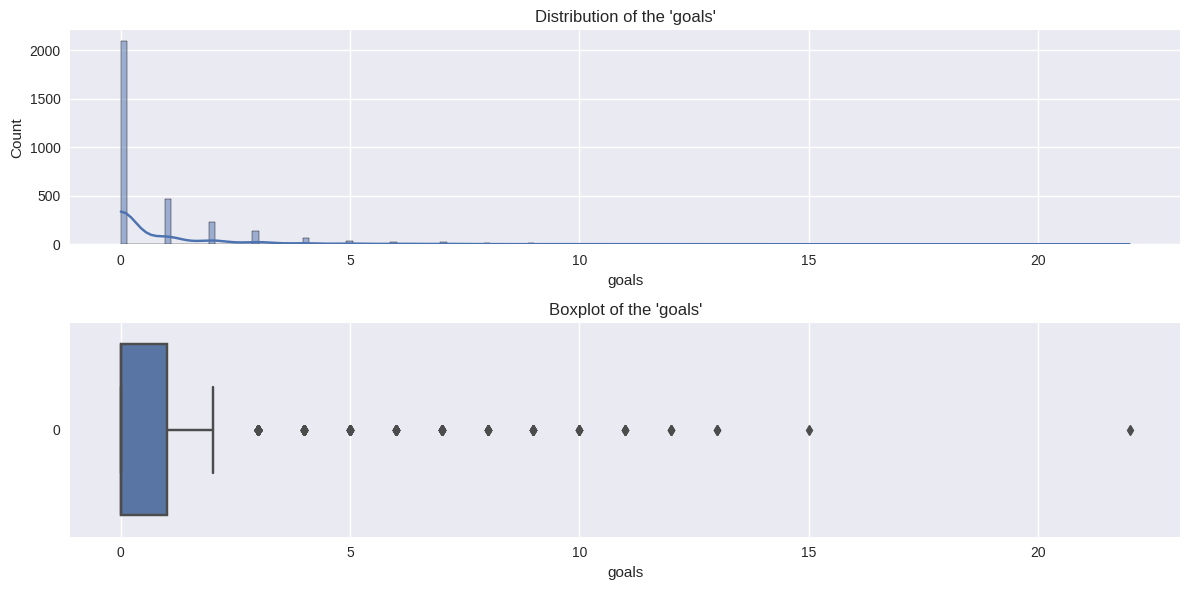

skewness: 3.75
kurtosis: 20.71


count   3,111.00
mean        0.80
std         1.70
min         0.00
25%         0.00
50%         0.00
75%         1.00
max        22.00
Name: ws_bramki_fixed, dtype: float64

In [334]:
plots_stats(df["ws_bramki_fixed"], "goals")

Pearson's correlation coefficient between ws_bramki_fixed and wartosc_log is 0.3612 and p-value 0.00.


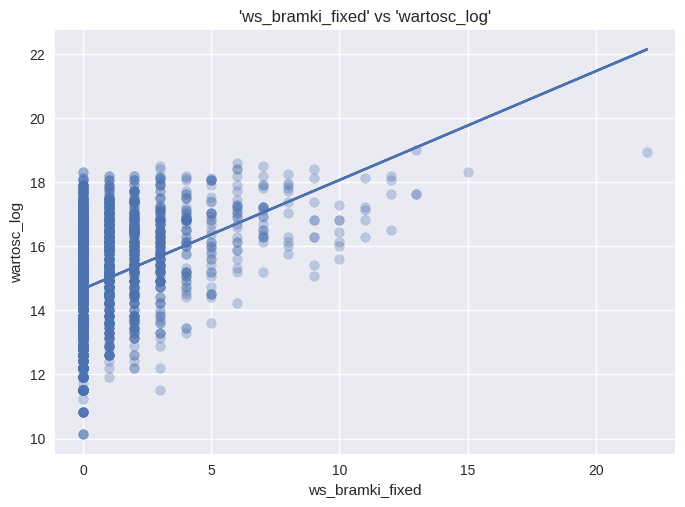

In [335]:
drop_na_plot_scatter_with_line(df, 'ws_bramki_fixed', 'wartosc_log')

##fifa_attributes

let's put together columns from fifa

In [336]:
sf_col = ['OVA', 'POT', 'ATTACKING', 'SKILL', 'MOVEMENT', 'POWER', 'MENTALITY', 'DEFENDING',
          'TOTAL', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']

Let's see how the data is distributed

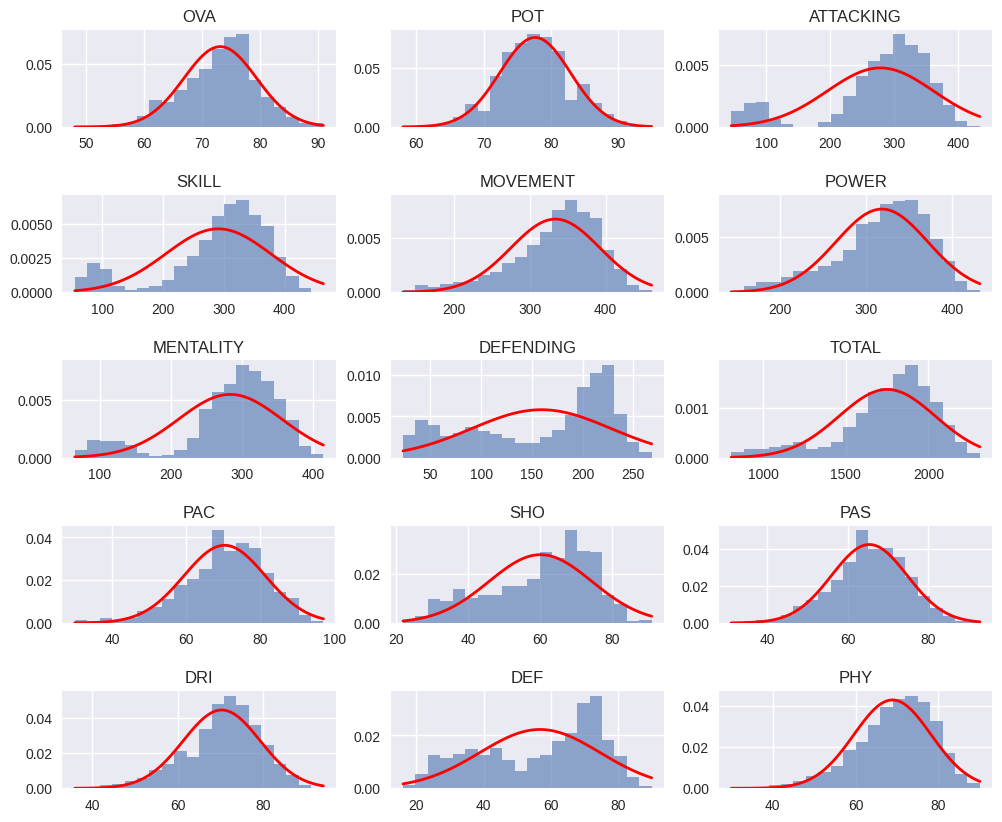

In [337]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
n = 1

for col in sf_col:
    plt.subplot(6, 3, n)
    n = n + 1

    # Check for non-finite values (NaN or Inf) and remove them
    data = df[col].values
    data = data[np.isfinite(data)]

    # Plot the histogram for each column
    plt.hist(data, bins=20, density=True, alpha=0.6)

    if len(data) > 0:  # Check if there are still valid data points
        # Fit a normal distribution to the data for each column
        mu, std = norm.fit(data)

        # Generate data for the normal distribution line
        x = np.linspace(data.min(), data.max(), 100)
        p = norm.pdf(x, mu, std)

        # Plot the PDF line
        plt.plot(x, p, 'r', linewidth=2)

    plt.title(col)

plt.subplots_adjust(hspace=0.7)

plt.show()


Some variables like POT, MOVEMENT, POWER, PAC, PAS, DRI, PHY and OVA have distributions similar to normal. Other variables like MENTALITY, DEFENDING and DEF have other non-normal distributions.

Let's take a look at Pearson's correlation coefficient with log_value vs values from fifa

In [338]:
for col in sf_col:
    print(("Pearson correlation coefficient between " + col +
           " and log_value is {0[0]: .4f} and p-value {0[1]: .4f}."
           ).format(stats.pearsonr(df[-df[col].isna()][col],df[-df[col].isna()]["wartosc_log"])))


Pearson correlation coefficient between OVA and log_value is  0.8010 and p-value  0.0000.
Pearson correlation coefficient between POT and log_value is  0.7916 and p-value  0.0000.
Pearson correlation coefficient between ATTACKING and log_value is  0.4582 and p-value  0.0000.
Pearson correlation coefficient between SKILL and log_value is  0.4609 and p-value  0.0000.
Pearson correlation coefficient between MOVEMENT and log_value is  0.4967 and p-value  0.0000.
Pearson correlation coefficient between POWER and log_value is  0.5221 and p-value  0.0000.
Pearson correlation coefficient between MENTALITY and log_value is  0.4853 and p-value  0.0000.
Pearson correlation coefficient between DEFENDING and log_value is  0.2715 and p-value  0.0000.
Pearson correlation coefficient between TOTAL and log_value is  0.5750 and p-value  0.0000.
Pearson correlation coefficient between PAC and log_value is  0.3563 and p-value  0.0000.
Pearson correlation coefficient between SHO and log_value is  0.2777 an

The highest Pearson correlation wit log_value have: <br>
 - OVA, POT (~0.8) <br>
 - TOT (0.57) <br>
 - POWER, DRI, PAS, MOVEMENT (~0.5)

Let's see how the fifa variables are correlated with each other

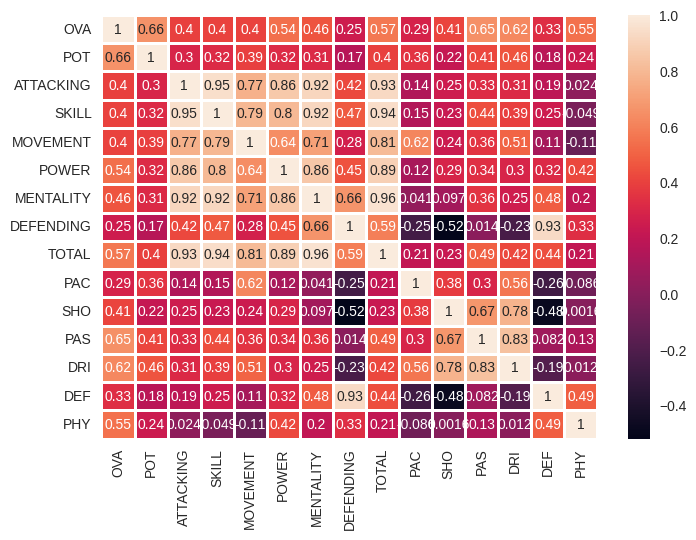

In [339]:
f, ax = plt.subplots()
sns.heatmap(df[sf_col].corr( method='pearson', min_periods=1),annot=True,linewidths=1)
plt.show()

The OVA and POT I plan to use have a moderate positive correlation with each other, so I'll use them both. TOTAL has a strong correlation with many variables, so I have to be careful when I want to use this feature (strong correlation with POWER and MOVEMENT). PAS and DRI are also highly correlated with each other

### OVA

Let's take a closer look at the OVA

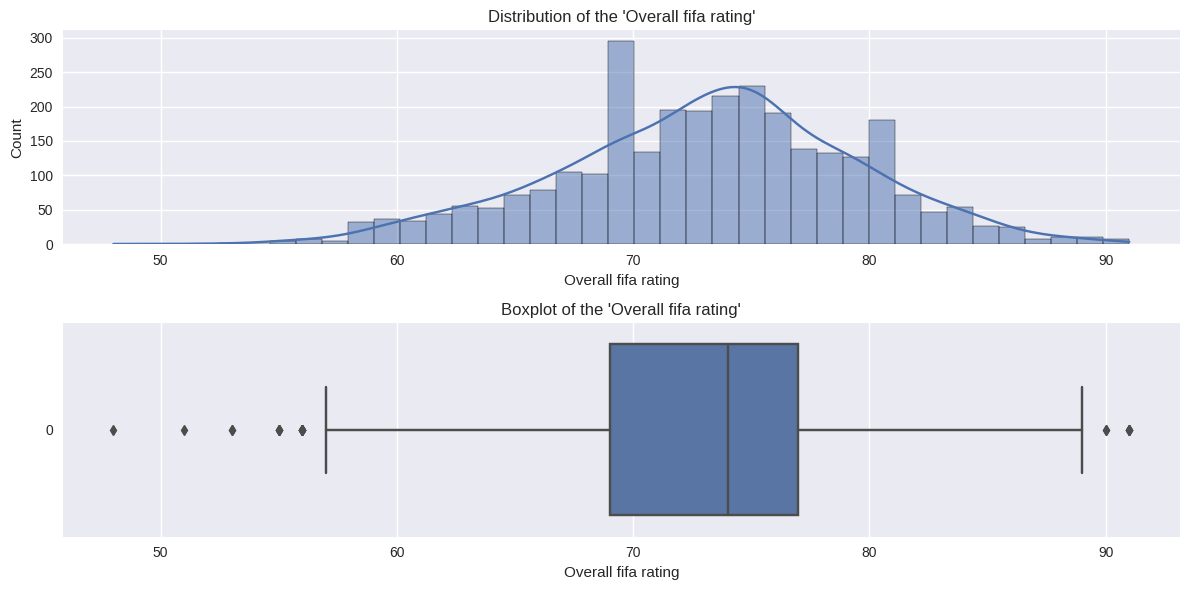

skewness: -0.19
kurtosis: 0.06


count   2,927.00
mean       73.16
std         6.29
min        48.00
25%        69.00
50%        74.00
75%        77.00
max        91.00
Name: OVA, dtype: float64

In [340]:
plots_stats(df["OVA"], "Overall fifa rating")

We can see outliers, but the distribution is normal

Pearson's correlation coefficient between OVA and wartosc_log is 0.8010 and p-value 0.00.


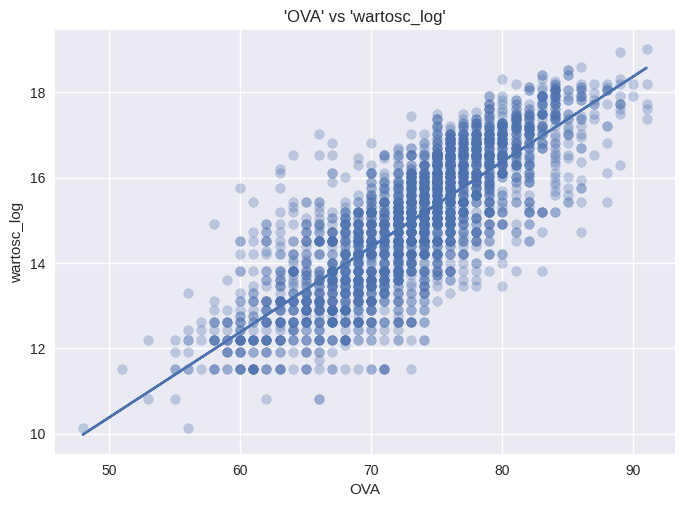

In [341]:
drop_na_plot_scatter_with_line(df, 'OVA', 'wartosc_log')

We can see that OVA is hihgly correlated with log_value. I will use this feature

I can fill nans with median for grouped_position in given club

In [342]:
df['OVA_fixed'] = df['OVA'].fillna(df.groupby(["klub", "position_grouped"])['OVA'].transform('median'))

In [343]:
df['OVA_fixed'].isnull().any()

False

Pearson's correlation coefficient between OVA_fixed and wartosc_log is 0.7759 and p-value 0.00.


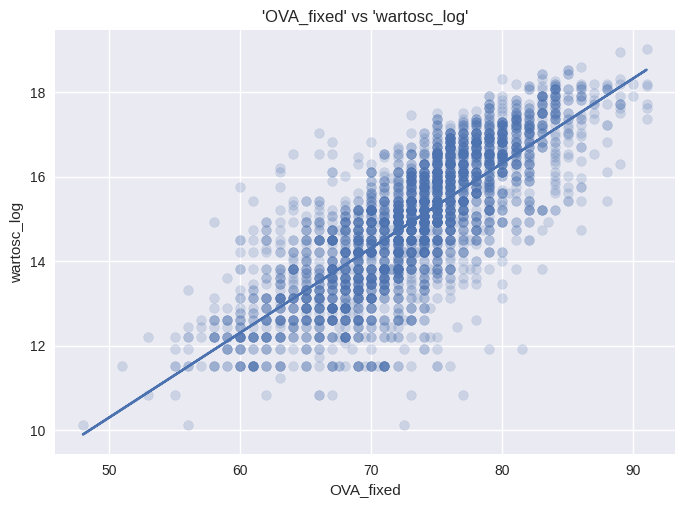

In [344]:
plot_scatter_with_line(df, 'OVA_fixed', 'wartosc_log')


Pearson's correlation dropped by 0.03 after the filling in nulls

### POT

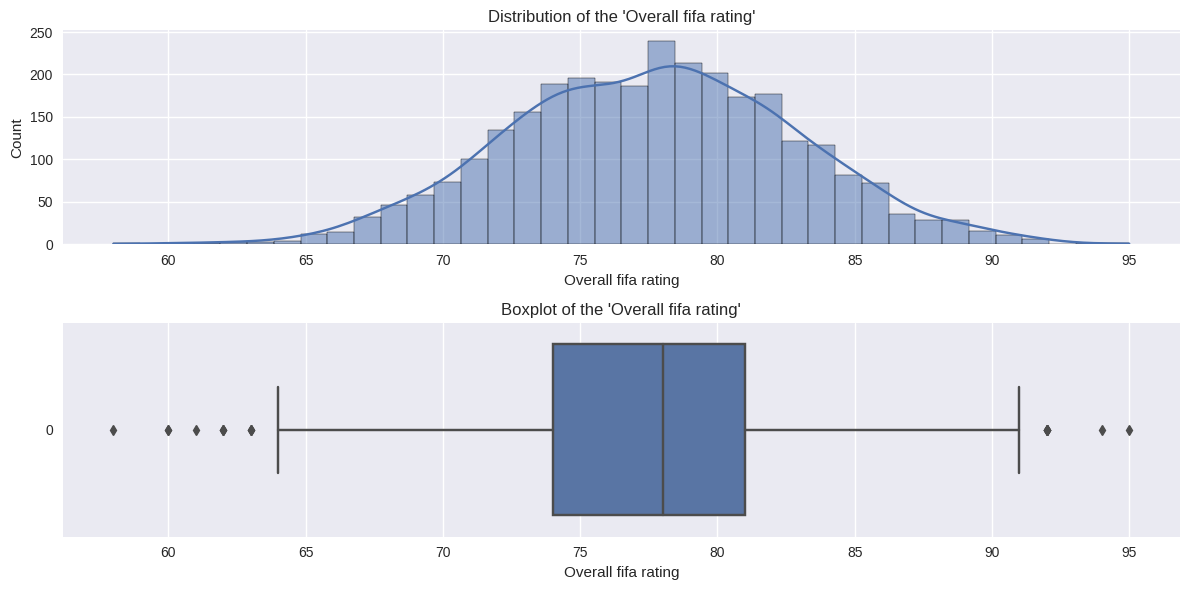

skewness: -0.01
kurtosis: -0.11


count   2,927.00
mean       77.66
std         5.25
min        58.00
25%        74.00
50%        78.00
75%        81.00
max        95.00
Name: POT, dtype: float64

In [345]:
plots_stats(df["POT"], "Overall fifa rating")

Like in OVA We can see outliers, but the distribution is normal

Pearson's correlation coefficient between POT and wartosc_log is 0.7916 and p-value 0.00.


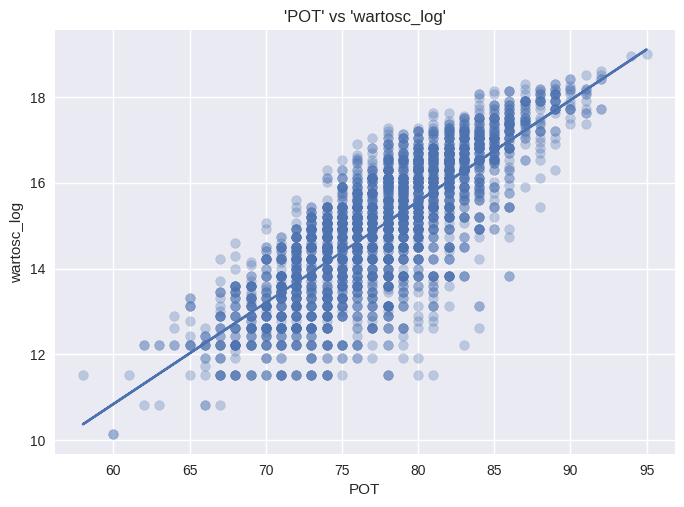

In [346]:
drop_na_plot_scatter_with_line(df, 'POT', 'wartosc_log')

Just like the OVA POT is hihgly correlated with log_value. I will use this feature

I can fill nans with median for grouped_position in given club

In [347]:
df['POT_fixed'] = df['POT'].fillna(df.groupby(["klub", "position_grouped"])['POT'].transform('median'))

In [348]:
df['POT_fixed'].isnull().any()

False

Pearson's correlation coefficient between POT_fixed and wartosc_log is 0.7714 and p-value 0.00.


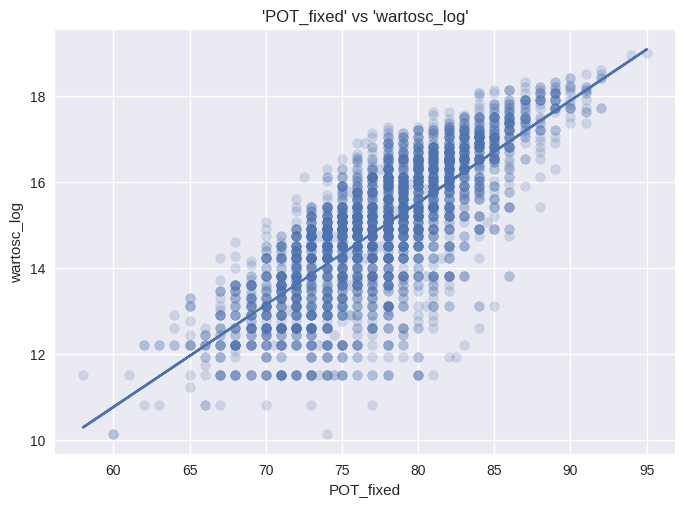

In [349]:
plot_scatter_with_line(df, 'POT_fixed', 'wartosc_log')


Pearson's correlation dropped by 0.03 after the filling in nulls

### TOT

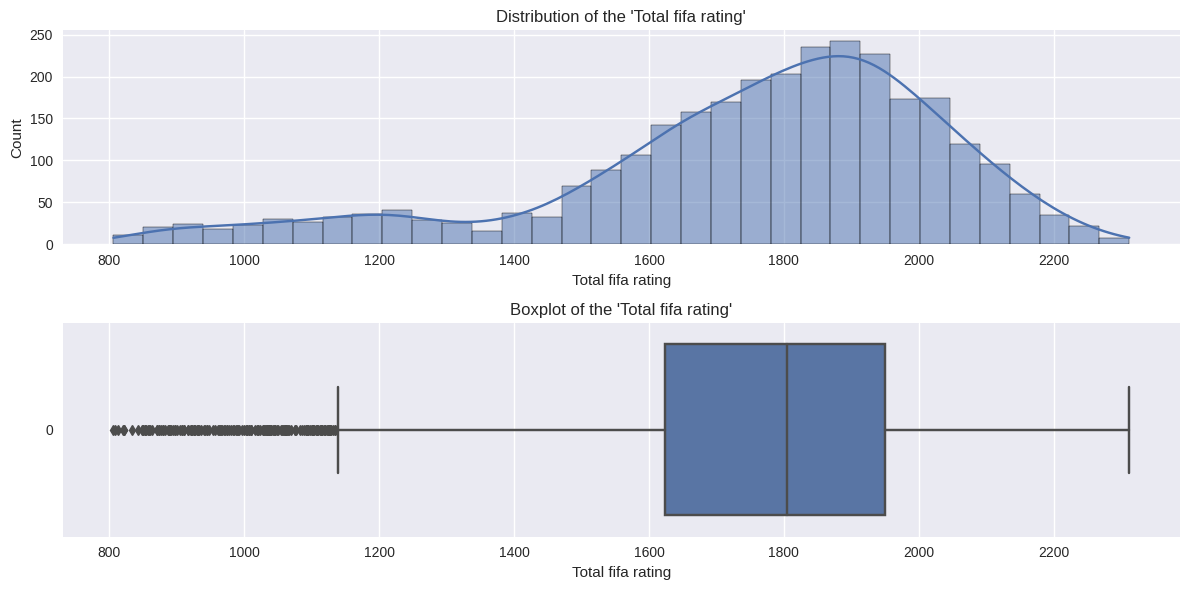

skewness: -1.05
kurtosis: 0.90


count   2,927.00
mean    1,750.65
std       292.26
min       806.00
25%     1,624.00
50%     1,805.00
75%     1,950.00
max     2,312.00
Name: TOTAL, dtype: float64

In [350]:
plots_stats(df["TOTAL"], "Total fifa rating")

Pearson's correlation coefficient between TOTAL and wartosc_log is 0.5750 and p-value 0.00.


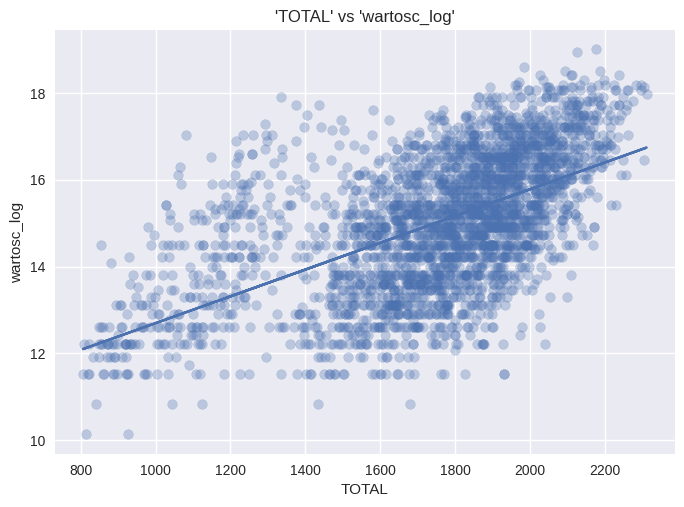

In [351]:
drop_na_plot_scatter_with_line(df, 'TOTAL', 'wartosc_log')

###fifa data completion

In [352]:
for col in sf_col:
  df[col+'_fixed'] = df[col].fillna(df.groupby(["klub", "position_grouped"])[col].transform('median'))

## first model try

In [353]:
total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
pd.set_option('display.max_rows', None)
print(missing_data)
pd.reset_option('display.max_rows')

                              Total  Percent
ws_asysty                       587     0.19
wystepy_lawka                   587     0.19
ws_wystepy_poczatek             587     0.19
wystepy_suma                    587     0.19
ws_srednia_ocena                587     0.19
ws_bramki                       587     0.19
ws_minuty                       587     0.19
ws_MotM                         587     0.19
ws_wygrane_pojedynki_na_mecz    587     0.19
ws_skutecznosc_podan            587     0.19
VALUE_EUR                       184     0.06
DRI                             184     0.06
DEF                             184     0.06
PHY                             184     0.06
SALARY_EUR                      184     0.06
SHO                             184     0.06
PAS                             184     0.06
PAC                             184     0.06
TOTAL                           184     0.06
DEFENDING                       184     0.06
MENTALITY                       184     0.06
POWER     

In [354]:
#df.to_excel("eda_fifa_df.xlsx")

In [355]:
sf_col_fixed = [col + "_fixed" for col in sf_col]
sf_col_fixed

['OVA_fixed',
 'POT_fixed',
 'ATTACKING_fixed',
 'SKILL_fixed',
 'MOVEMENT_fixed',
 'POWER_fixed',
 'MENTALITY_fixed',
 'DEFENDING_fixed',
 'TOTAL_fixed',
 'PAC_fixed',
 'SHO_fixed',
 'PAS_fixed',
 'DRI_fixed',
 'DEF_fixed',
 'PHY_fixed']

In [356]:
#df = df[sf_col_fixed + ['wiek', 'Bramkarz', 'pomocnik', 'obrońca', 'napastnik', 'ws_srednia_ocena_fixed', 'ws_bramki_fixed', 'wartosc_log']].copy()

In [360]:
df = df[sf_col_fixed + ['wiek', 'ws_srednia_ocena_fixed', 'ws_bramki_fixed', 'wartosc_log']].copy()

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 0 to 3125
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OVA_fixed               3111 non-null   float64
 1   POT_fixed               3111 non-null   float64
 2   ATTACKING_fixed         3111 non-null   float64
 3   SKILL_fixed             3111 non-null   float64
 4   MOVEMENT_fixed          3111 non-null   float64
 5   POWER_fixed             3111 non-null   float64
 6   MENTALITY_fixed         3111 non-null   float64
 7   DEFENDING_fixed         3111 non-null   float64
 8   TOTAL_fixed             3111 non-null   float64
 9   PAC_fixed               3111 non-null   float64
 10  SHO_fixed               3111 non-null   float64
 11  PAS_fixed               3111 non-null   float64
 12  DRI_fixed               3111 non-null   float64
 13  DEF_fixed               3111 non-null   float64
 14  PHY_fixed               3111 non-null   

In [362]:
from sklearn.model_selection import train_test_split

X = df.drop('wartosc_log', axis=1)  # Features
y = df['wartosc_log']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [363]:
X = sm.add_constant(X)
ks = sm.OLS(y_train, X_train)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            wartosc_log   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          5.475e+04
Date:                Wed, 26 Jul 2023   Prob (F-statistic):                        0.00
Time:                        21:27:34   Log-Likelihood:                         -2818.4
No. Observations:                2488   AIC:                                      5673.
Df Residuals:                    2470   BIC:                                      5778.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
OVA_fixed                  0.1698      0.007     23.455      0.000       0.156       0.184
POT_fixed                  0.0524      0.005      9.606      0.000       0.042       0.063
ATTACKING_fixed            0.0058      0.001      4.990      0.000       0.004       0.008
SKILL_fixed                0.0018      0.001      1.399      0.162      -0.001       0.004
MOVEMENT_fixed             0.0021      0.001      1.423      0.155      -0.001       0.005
POWER_fixed                0.0054      0.001      3.641      0.000       0.003       0.008
MENTALITY_fixed            0.0056      0.001      3.982      0.000       0.003       0.008
DEFENDING_fixed            0.0038      0.002      2.333      0.020       0.001       0.007
TOTAL_fixed               -0.0051      0.001     -4.311      0.000      -0.007      -0.003
PAC_fixed                  0.0088      0.003      2.554      0.011       0.002       0.016
SHO_fixed                 -0.0059      0.004     -1.480      0.139      -0.014       0.002
PAS_fixed                  0.0065      0.005      1.310      0.190      -0.003       0.016
DRI_fixed                  0.0307      0.005      5.641      0.000       0.020       0.041
DEF_fixed                  0.0068      0.005      1.319      0.187      -0.003       0.017
PHY_fixed                  0.0063      0.005      1.362      0.173      -0.003       0.015
wiek                      -0.0927      0.006    -16.725      0.000      -0.104      -0.082
ws_srednia_ocena_fixed    -0.1102      0.044     -2.492      0.013      -0.197      -0.023
ws_bramki_fixed            0.0736      0.011      7.008      0.000       0.053       0.094
==============================================================================
Omnibus:                      682.420   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3291.685
Skew:                          -1.227   Prob(JB):                         0.00
Kurtosis:                       8.073   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I will use XGBoost to find Feature importance

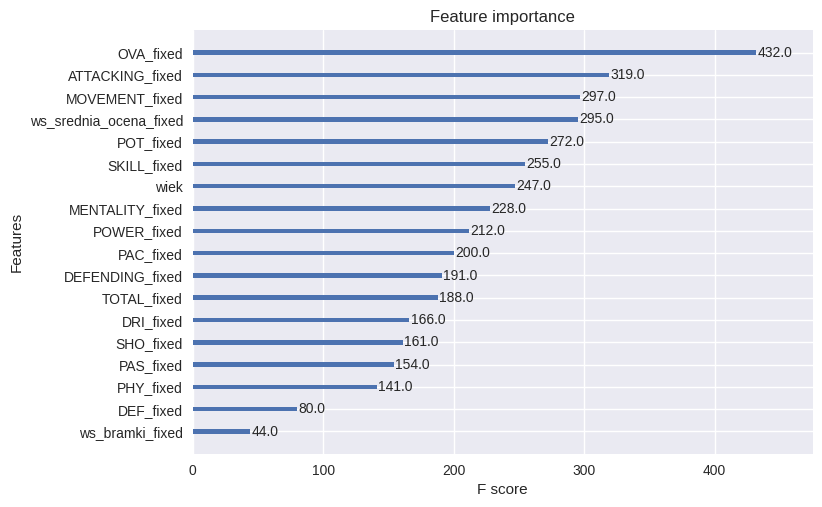

In [364]:
import xgboost as xgb
from xgboost import plot_importance
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
importances = model.feature_importances_
plot_importance(model)
plt.show()

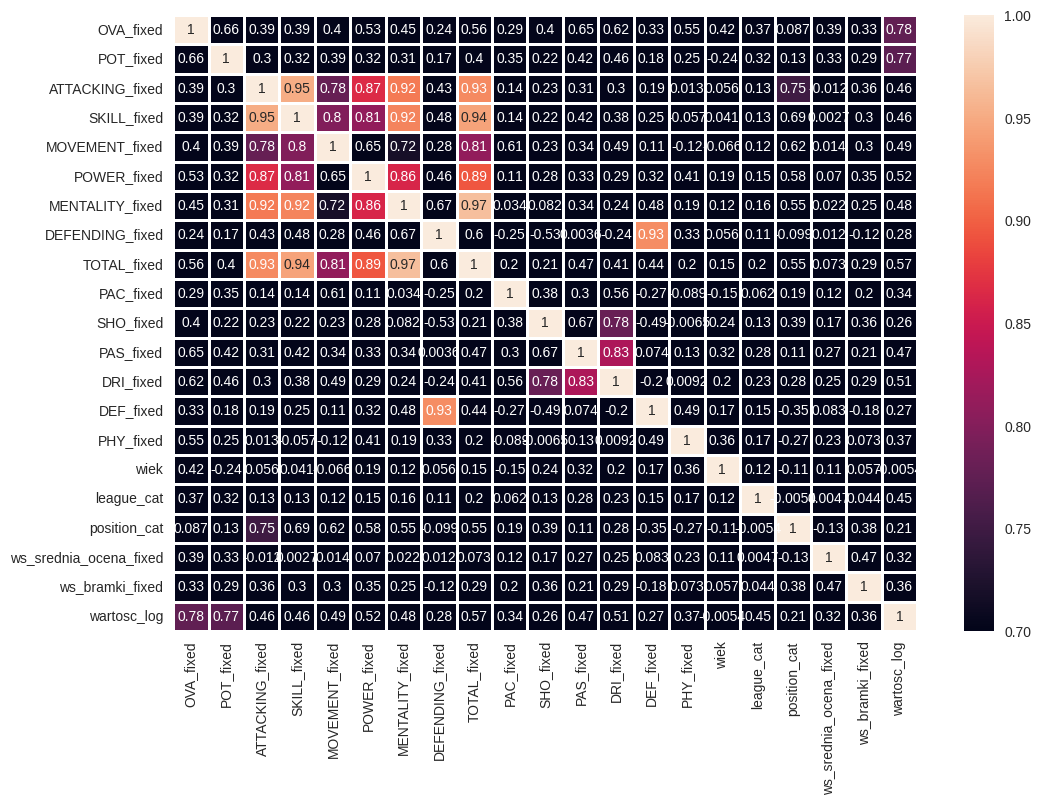

In [102]:
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr( method='pearson', min_periods=1),annot=True,linewidths=1, vmin=0.7)
plt.show()

In [1002]:
df.drop(['SKILL_fixed', 'MOVEMENT_fixed', 'DEFENDING_fixed', 'SHO_fixed', 'PAS_fixed', 'DEF_fixed', 'PHY_fixed', 'position_cat', 'ws_srednia_ocena_fixed'], axis=1, inplace=True)

In [1004]:
X = df.drop('wartosc_log', axis=1)  # Features
y = df['wartosc_log']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1005]:
X = sm.add_constant(X)
ks = sm.OLS(y_train, X_train)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            wartosc_log   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          9.764e+04
Date:                Mon, 24 Jul 2023   Prob (F-statistic):                        0.00
Time:                        22:17:42   Log-Likelihood:                         -2715.2
No. Observations:                2488   AIC:                                      5452.
Df Residuals:                    2477   BIC:                                      5516.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
OVA_fixed           0.1651      0.006     27.440      0.000       0.153       0.177
POT_fixed           0.0519      0.004     13.655      0.000       0.044       0.059
ATTACKING_fixed     0.0002      0.001      0.315      0.753      -0.001       0.001
POWER_fixed         0.0018      0.001      2.566      0.010       0.000       0.003
MENTALITY_fixed     0.0039      0.001      3.535      0.000       0.002       0.006
TOTAL_fixed        -0.0006      0.000     -1.713      0.087      -0.001    8.69e-05
PAC_fixed           0.0070      0.002      3.735      0.000       0.003       0.011
DRI_fixed          -0.0040      0.003     -1.466      0.143      -0.009       0.001
wiek               -0.0956      0.005    -21.193      0.000      -0.104      -0.087
league_cat          0.1565      0.009     17.072      0.000       0.139       0.174
ws_bramki_fixed     0.0591      0.010      6.167      0.000       0.040       0.078
==============================================================================
Omnibus:                      782.736   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4016.105
Skew:                          -1.404   Prob(JB):                         0.00
Kurtosis:                       8.555   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

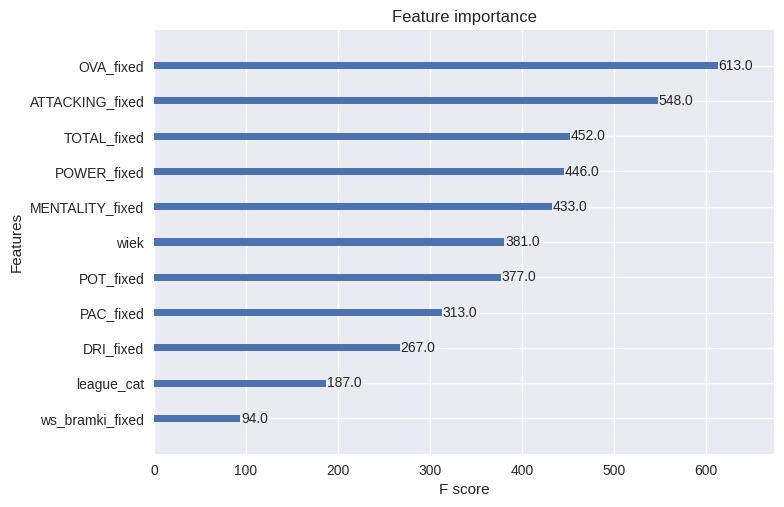

In [1006]:
import xgboost as xgb
from xgboost import plot_importance
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
importances = model.feature_importances_
plot_importance(model)
plt.show()

In [890]:
lm = LinearRegression()

In [891]:
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

0.7796494809912041

In [883]:
y_train_price = lm.predict(X_train)

In [884]:
y_pred_test = lm.predict(X_test)

In [885]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.7796494809912041

In [ ]:
y_pred = lm.predict(X)

In [ ]:
actual = np.exp(y)
pred = np.exp(y_pred)
pred_y_df = pd.DataFrame({'Actual Value':actual, 'Predicted_value':pred, 'Diff': actual-pred})
pred_y_df['nazwa'] = df_test['pilkarz']
pred_y_df['klub'] = df_test['klub']

In [ ]:
pred_y_df.sort_values(by='Diff', ascending=False).head(10)

,Actual Value,Predicted_value,Diff,nazwa,klub
963,"90,000,000.00","34,350,296.88","55,649,703.12",Gavi,FC Barcelona
2555,"80,000,000.00","37,901,051.73","42,098,948.27",Rodrygo,Real Madryt
1937,"75,000,000.00","33,467,046.29","41,532,953.71",Mason Mount,Chelsea FC
1748,"75,000,000.00","34,017,066.65","40,982,933.35",Luis Diaz,FC Liverpool
1190,"70,000,000.00","29,148,377.32","40,851,622.68",Jack Grealish,Manchester City
402,"75,000,000.00","34,740,844.90","40,259,155.10",Bruno Fernandes,Manchester United
1662,"70,000,000.00","29,945,201.52","40,054,798.48",Leroy Sane,Bayern Monachium
2451,"70,000,000.00","34,760,240.27","35,239,759.73",Raheem Sterling,Chelsea FC
2692,"65,000,000.00","29,854,663.80","35,145,336.20",Serge Gnabry,Bayern Monachium
2079,"60,000,000.00","25,208,935.43","34,791,064.57",Mikel Oyarzabal,Real Sociedad


In [ ]:
pred_y_df.sort_values(by='Diff', ascending=True).head(10)

,Actual Value,Predicted_value,Diff,nazwa,klub
1619,"180,000,000.00","364,380,838.21","-184,380,838.21",Kylian Mbappe,FC Paris Saint-Germain
2518,"45,000,000.00","156,651,600.61","-111,651,600.61",Robert Lewandowski,FC Barcelona
1521,"35,000,000.00","145,785,739.55","-110,785,739.55",Karim Benzema,Real Madryt
930,"50,000,000.00","150,298,019.07","-100,298,019.07",Frenkie de Jong,FC Barcelona
1678,"50,000,000.00","138,929,727.46","-88,929,727.46",Lionel Messi,FC Paris Saint-Germain
797,"170,000,000.00","239,302,994.79","-69,302,994.79",Erling Haaland,Manchester City
1556,"80,000,000.00","143,474,249.88","-63,474,249.88",Kevin De Bruyne,Manchester City
2959,"50,000,000.00","111,955,793.36","-61,955,793.36",Virgil van Dijk,FC Liverpool
1763,"10,000,000.00","68,887,032.49","-58,887,032.49",Luka Modric,Real Madryt
2616,"60,000,000.00","107,599,759.99","-47,599,759.99",Sadio Mane,Bayern Monachium
